In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools
import scikit_posthocs as sp
import pingouin as pg
import os
from scipy.stats import chi2_contingency

In [2]:
### Functions

def count_words(text):
    words = text.split()
    return len(words)

def plot_chi2(observed, expected, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot observed frequencies
    sns.heatmap(observed, annot=True, fmt="d", ax=axes[0])
    axes[0].set_title('Observed Frequencies')

    # Plot expected frequencies
    sns.heatmap(expected, annot=True, fmt=".1f", ax=axes[1])
    axes[1].set_title('Expected Frequencies')

    # Add chi-squared stats annotations
    plt.suptitle(f'Chi-Squared Test: Chi2 = {chi2:.2f}, p = {p:.3f}, {title}')

    plt.show()

def calculate_chi2(x, y):
    contingency_table = pd.crosstab(x, y)  # 'Next Step developed in chat', 'Chat Succesfull', 'Contained technical issue'
    #contingency_table["Readiness not Increased"] = contingency_table["Readiness No Change"] + contingency_table["Readiness Decreased"]
    #contingency_table = contingency_table[['Readiness Increased', 'Readiness not Increased']]
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Output the results
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:")
    print(expected)
    plot_chi2(contingency_table, expected, "")

def plot_correlation(data, title=""):
    # Calculate correlation coefficients and p-values
    corr_matrix = data.corr()
    num_comps = len(corr_matrix) * len(corr_matrix)
    print(f"Number of Comparisons: {num_comps}")
    print(f"Bonferroni-Corrected Alpha: {0.05/num_comps}")
    p_value_matrix = data.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

    # Apply the format function to the correlation values
    formatted_corr_matrix = corr_matrix.applymap(lambda x: f"{x:.2f}")
    annotated_corr_matrix = np.where(p_value_matrix < (0.05/num_comps), formatted_corr_matrix + "*", formatted_corr_matrix)

    # Create a heatmap with correlation values and stars for significance
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=annotated_corr_matrix, cmap='coolwarm', fmt="", linewidths=0.5, 
                square=True, xticklabels=True, yticklabels=True, cbar=True)

    plt.title("Correlations with Significance (Bonferroni-Corrected)")
    plt.savefig(f"Correlation_Analysis_{title}.png", bbox_inches="tight")
    plt.show()


In [3]:
user = pd.read_csv("Consolidated_Data/user_preprocessed_with_demographics.csv")
user["condition"] = user["condition"].replace({"framework": "MI-adapted", "no_system": "GPT-4"})

orig_user = pd.read_csv("Main_Study/user.csv", sep=";")

## Descriptive analysis

In [5]:
user.groupby("condition").target_behaviour.value_counts()

condition   target_behaviour       
GPT-4       weniger prokrastinieren    46
            gesünder essen             21
            nachhaltiger leben         10
MI-adapted  weniger prokrastinieren    51
            gesünder essen             26
            nachhaltiger leben          2
Name: count, dtype: int64

In [6]:
user.groupby("condition")[["User Engagement", "Therapeutic Alliance", "Perception of MI", "Communication Competence", "Perceived Empathy", "Readiness to Change (Delta)"]].mean().round(2)

,User Engagement,Therapeutic Alliance,Perception of MI,Communication Competence,Perceived Empathy,Readiness to Change (Delta)
condition,,,,,,
GPT-4,3.36,2.73,32.91,3.92,3.00,0.73
MI-adapted,3.20,2.34,32.41,3.64,2.83,0.87


In [7]:
user.groupby(["condition"])[['gut/hilfreich', 'schlecht/unpassend']].mean().round(2)

,gut/hilfreich,schlecht/unpassend
condition,,
GPT-4,5.60,1.39
MI-adapted,5.44,1.58


In [8]:
user.groupby(["condition"])[['gut/hilfreich', 'schlecht/unpassend']].std().round(2)

,gut/hilfreich,schlecht/unpassend
condition,,
GPT-4,1.42,1.42
MI-adapted,1.51,1.59


In [9]:
user.groupby(["condition"])[['change',
       'Follow/Neutral', 'sustain', 'Reason', 'Commitment', 'Taking Steps',
       'desire', 'General Reason', 'ability', 'need']].mean().round(2)

,change,Follow/Neutral,sustain,Reason,Commitment,Taking Steps,desire,General Reason,ability,need
condition,,,,,,,,,,
GPT-4,3.60,4.31,1.03,3.34,0.92,0.36,0.68,1.60,0.73,0.34
MI-adapted,3.76,4.00,1.25,3.78,0.71,0.52,0.76,1.92,0.90,0.26


In [10]:
user.groupby(["condition"])[['change',
       'Follow/Neutral', 'sustain', 'Reason', 'Commitment', 'Taking Steps',
       'desire', 'General Reason', 'ability', 'need']].std().round(2)

,change,Follow/Neutral,sustain,Reason,Commitment,Taking Steps,desire,General Reason,ability,need
condition,,,,,,,,,,
GPT-4,1.78,1.6,1.01,1.41,0.94,0.67,0.82,1.36,0.84,0.60
MI-adapted,1.98,1.8,1.14,1.48,0.70,0.80,0.86,1.29,0.88,0.55


In [ ]:
user.groupby(["condition"])[['change',
       'Follow/Neutral', 'sustain', 'Reason', 'Commitment', 'Taking Steps',
       'desire', 'General Reason', 'ability', 'need']].std().round(2)

,change,Follow/Neutral,sustain,Reason,Commitment,Taking Steps,desire,General Reason,ability,need
condition,,,,,,,,,,
GPT-4,1.78,1.6,1.01,1.41,0.94,0.67,0.82,1.36,0.84,0.60
MI-adapted,1.98,1.8,1.14,1.48,0.70,0.80,0.86,1.29,0.88,0.55


In [ ]:
user[["Pre-informed/finds own solution"]].value_counts(normalize=True).round(4)

Pre-informed/finds own solution
0.0                                0.5577
1.0                                0.4423
Name: proportion, dtype: float64

In [9]:
user.groupby("condition")[["Cooperative"]].value_counts(normalize=True)

condition   Cooperative
GPT-4       1.0            0.714286
            0.0            0.285714
MI-adapted  1.0            0.772152
            0.0            0.227848
Name: proportion, dtype: float64

In [ ]:
user.groupby("condition")[["Pre-informed/finds own solution"]].value_counts(normalize=True).round(4)

condition   Pre-informed/finds own solution
GPT-4       0.0                                0.5584
            1.0                                0.4416
MI-adapted  0.0                                0.5570
            1.0                                0.4430
Name: proportion, dtype: float64

In [ ]:
user.groupby("condition")[["User Engagement", "Therapeutic Alliance", "Perception of MI", "Communication Competence", "Perceived Empathy", "Readiness to Change (Delta)"]].std().round(2)

,User Engagement,Therapeutic Alliance,Perception of MI,Communication Competence,Perceived Empathy,Readiness to Change (Delta)
condition,,,,,,
GPT-4,0.81,0.86,5.35,0.76,1.12,2.05
MI-adapted,0.91,0.84,5.71,0.92,1.09,2.02


# Main Analyses

### Correlation Analysis of collected measures

In [ ]:
user.groupby("condition")["Time taken"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
GPT-4,78.0,23.448504,12.647354,11.566667,16.7375,20.000000,26.6375,104.683333
MI-adapted,79.0,23.328903,9.504085,10.983333,17.7750,21.516667,25.7000,59.983333


Number of Comparisons: 81
Bonferroni-Corrected Alpha: 0.0006172839506172839


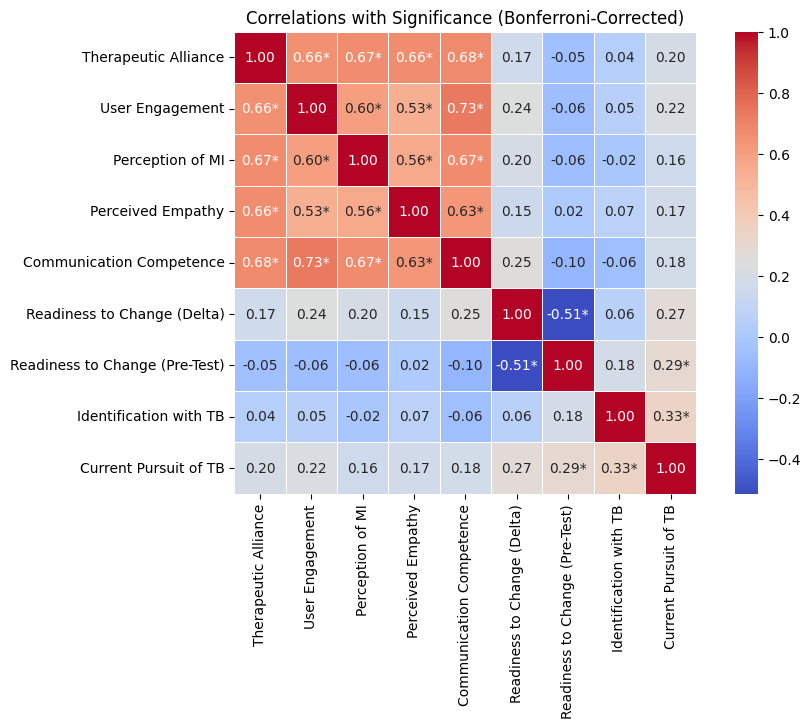

In [ ]:
user_corr = user.copy()

user_corr.rename(columns={"readiness_to_change_start": "Readiness to Change (Pre-Test)", 'identification_with_goal':'Identification with TB', 
                 'current_pursuit_of_target':'Current Pursuit of TB'}, inplace=True)

plot_correlation(user_corr[['Therapeutic Alliance', 'User Engagement',
       'Perception of MI', 'Perceived Empathy',
       'Communication Competence', 'Readiness to Change (Delta)',
       "Readiness to Change (Pre-Test)", 'Identification with TB', 'Current Pursuit of TB']], title="Measures")

### Harmfulness evaluation

In [ ]:
user.groupby("condition")["harmful"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
GPT-4,77.0,3.831169,2.073661,0.0,2.0,3.0,5.0,9.0
MI-adapted,78.0,0.500000,0.893701,0.0,0.0,0.0,1.0,4.0


In [ ]:
user.groupby("condition")["gut/hilfreich"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
GPT-4,77.0,5.597403,1.416628,1.0,5.0,6.0,7.0,8.0
MI-adapted,78.0,5.435897,1.508330,0.0,5.0,6.0,7.0,7.0


In [ ]:
user.groupby("condition")["schlecht/unpassend"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
GPT-4,77.0,1.389610,1.415663,0.0,0.0,1.0,2.0,6.0
MI-adapted,78.0,1.576923,1.591530,0.0,0.0,1.0,2.0,7.0


In [ ]:
pg.normality(data=user, dv="harmful", group="condition")

,W,pval,normal
condition,,,
MI-adapted,0.62264,7.473939e-13,False
GPT-4,0.95820,1.267589e-02,False


In [ ]:
harmful_framework = user[user["condition"] == "MI-adapted"]
harmful_no_system = user[user["condition"] == "GPT-4"]

harmful_framework = harmful_framework[["harmful"]]
harmful_no_system = harmful_no_system[["harmful"]]

In [ ]:
pg.mwu(x=harmful_framework, y=harmful_no_system, alternative="less")

,U-val,alternative,p-val,RBC,CLES
MWU,391.5,less,3.228387e-22,0.86963,0.934815


In [ ]:
turns = pd.read_csv("Main_Study/turns_with_context.csv")
turns = turns[~turns["bot_action"].isin(["Summary", "Next Steps"])]

contingency = pd.crosstab(turns["condition"], turns["user_rating"])
chi2(contingency_table=contingency)


Chi-Square Statistic: 0.27029423207611025
P-value: 0.6031344672275156
Degrees of Freedom: 1
Expected Frequencies Table:
[[328.53874539  89.46125461]
 [310.46125461  84.53874539]]


### Comparison of Therapeutic Alliance and Perception of MI

In [ ]:
user.groupby("condition")[["Therapeutic Alliance", "Perception of MI", "Perception MI Inadherent"]].mean()

,Therapeutic Alliance,Perception of MI,Perception MI Inadherent
condition,,,
GPT-4,2.727564,32.910256,3.435897
MI-adapted,2.340717,32.405063,2.481013


#### Test for Normality

In [ ]:
pg.normality(data=user, dv="Therapeutic Alliance", group="condition")

,W,pval,normal
condition,,,
MI-adapted,0.962533,0.020397,False
GPT-4,0.976415,0.156571,True


In [ ]:
pg.normality(data=user, dv="Perception of MI", group="condition")

,W,pval,normal
condition,,,
MI-adapted,0.975592,0.134078,True
GPT-4,0.981516,0.317276,True


In [ ]:
pg.normality(data=user, dv="Perception MI Inadherent", group="condition")

,W,pval,normal
condition,,,
MI-adapted,0.885346,0.000003,False
GPT-4,0.949495,0.003740,False


#### Stats Test: Mann-Whitney U

In [4]:
framework = user[user["condition"] == "MI-adapted"]
no_system = user[user["condition"] == "GPT-4"]

framework_perception = framework[["Perception of MI"]]
no_system_perception = no_system[["Perception of MI"]]

framework_therapeutic = framework[["Therapeutic Alliance"]]
no_system_therapeutic = no_system[["Therapeutic Alliance"]]

framework_inadherent_perception = framework[["Perception MI Inadherent"]]
no_system_inadherent_perception = no_system[["Perception MI Inadherent"]]


In [ ]:
stats.ttest_ind(framework_perception, no_system_perception, alternative="greater") # no significant

TtestResult(statistic=array([-0.57236381]), pvalue=array([0.71604761]), df=array([155.]))

In [ ]:
pg.mwu(x=framework_inadherent_perception, y=no_system_inadherent_perception, alternative="less") # Framework condition exhibits significantly less MI-inadherent behaviour!

,U-val,alternative,p-val,RBC,CLES
MWU,2264.0,less,0.001857,0.265174,0.632587


In [5]:
pg.mwu(x=framework_therapeutic, y=no_system_therapeutic, alternative="greater") # no_system is significantly higher!

,U-val,alternative,p-val,RBC,CLES
MWU,2302.0,greater,0.99691,0.25284,0.37358


In [6]:
pg.mwu(y=framework_therapeutic, x=no_system_therapeutic, alternative="greater") # no_system is significantly higher!

,U-val,alternative,p-val,RBC,CLES
MWU,3860.0,greater,0.003123,-0.25284,0.62642


#### Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'wai_sr_1'),
  Text(1, 0, 'wai_sr_2'),
  Text(2, 0, 'wai_sr_3'),
  Text(3, 0, 'wai_sr_4'),
  Text(4, 0, 'wai_sr_5'),
  Text(5, 0, 'wai_sr_6'),
  Text(6, 0, 'wai_sr_7'),
  Text(7, 0, 'wai_sr_8'),
  Text(8, 0, 'wai_sr_9'),
  Text(9, 0, 'wai_sr_10'),
  Text(10, 0, 'wai_sr_11'),
  Text(11, 0, 'wai_sr_12')])

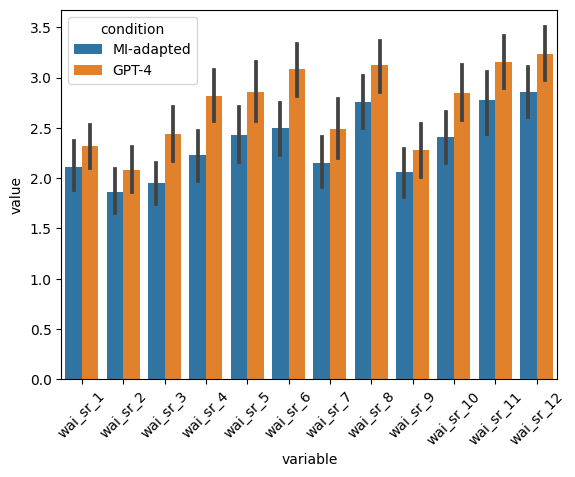

In [ ]:
user_ta_melted = pd.melt(user, ["condition"], ["wai_sr_1", "wai_sr_2", "wai_sr_3", "wai_sr_4", "wai_sr_5", "wai_sr_6",
                      "wai_sr_7", "wai_sr_8", "wai_sr_9", "wai_sr_10", "wai_sr_11", "wai_sr_12"])
 
sns.barplot(user_ta_melted, x="variable", y="value", hue="condition")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'pm_1'),
  Text(1, 0, 'pm_2'),
  Text(2, 0, 'pm_3'),
  Text(3, 0, 'pm_4'),
  Text(4, 0, 'pm_5'),
  Text(5, 0, 'pm_6'),
  Text(6, 0, 'pm_7'),
  Text(7, 0, 'pm_8'),
  Text(8, 0, 'pm_9'),
  Text(9, 0, 'pm_10'),
  Text(10, 0, 'pm_11')])

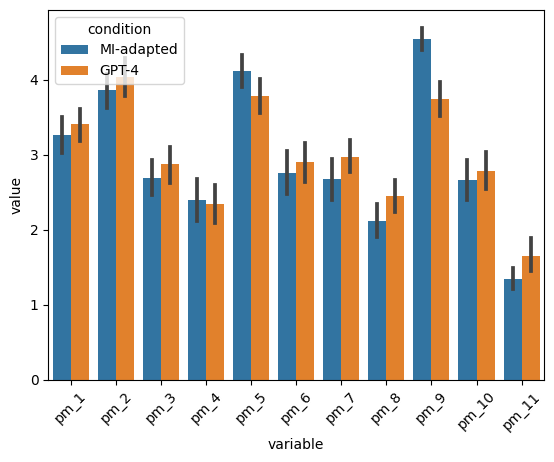

In [ ]:
user_mi_melted = pd.melt(user, ["condition"], ["pm_1", "pm_2", "pm_3", "pm_4", "pm_5", "pm_6", "pm_7", "pm_8", "pm_9", "pm_10", "pm_11"])

sns.barplot(user_mi_melted, x="variable", y="value", hue="condition")
plt.xticks(rotation=45)

### Readiness to change

if all are taken into account: framework slightly better than no system 

**Potential Conclusion:** Framework might be better at persuading people with low readiness to change/in precontemplation? 

In [ ]:
readiness_user = user[user["identification_with_goal"] >= 7].copy()
readiness_user["condition"].value_counts()

condition
GPT-4         64
MI-adapted    63
Name: count, dtype: int64

In [ ]:
user.groupby(["condition"])[["Readiness to Change (Delta)"]].describe()

Readiness to Change (Delta)                                         \
                                 count      mean      std  min  25%  50%  75%   
condition                                                                       
GPT-4                             78.0  0.730769  2.04922 -8.0  0.0  1.0  2.0   
MI-adapted                        78.0  0.871795  2.01526 -4.0  0.0  1.0  1.0   

                 
            max  
condition        
GPT-4       6.0  
MI-adapted  9.0

#### Statstests

##### Between Systems

In [ ]:
pg.normality(data=readiness_user, dv="Readiness to Change (Delta)", group="condition")

,W,pval,normal
condition,,,
MI-adapted,0.821035,2.833985e-07,False
GPT-4,0.849071,1.539047e-06,False


In [ ]:
user_framework = readiness_user[readiness_user["condition"] == "MI-adapted"]
user_no_system = readiness_user[readiness_user["condition"] == "GPT-4"]

user_framework = user_framework[["Readiness to Change (Delta)"]]
user_no_system = user_no_system[["Readiness to Change (Delta)"]]

In [ ]:
pg.mwu(user_framework, user_no_system, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,1646.0,greater,0.967443,0.183532,0.408234


##### Within Systems

In [ ]:
readiness_change = pd.melt(user, id_vars="condition", value_vars=['readiness_to_change_start','readiness_to_change_end'])

In [ ]:
pg.normality(data=readiness_change, dv="value", group="variable")

,W,pval,normal
variable,,,
readiness_to_change_start,0.923461,2.279972e-07,False
readiness_to_change_end,0.890542,2.361771e-09,False


In [ ]:
framework_change = readiness_change[readiness_change["condition"] == "MI-adapted"]
no_system_change = readiness_change[readiness_change["condition"] == "GPT-4"]

In [ ]:
print(pg.normality(data=framework_change, dv="value", group="variable"))
pg.normality(data=no_system_change, dv="value", group="variable")

                                  W      pval  normal
variable                                             
readiness_to_change_start  0.897954  0.000013   False
readiness_to_change_end    0.896823  0.000011   False


,W,pval,normal
variable,,,
readiness_to_change_start,0.934758,0.000609,False
readiness_to_change_end,0.891731,0.000007,False


In [ ]:
before = readiness_change[readiness_change["variable"] == "readiness_to_change_start"]["value"]
after = readiness_change[readiness_change["variable"] == "readiness_to_change_end"]["value"]

before_framework = framework_change[framework_change["variable"] == "readiness_to_change_start"]["value"]
after_framework = framework_change[framework_change["variable"] == "readiness_to_change_end"]["value"]

before_no_system = no_system_change[no_system_change["variable"] == "readiness_to_change_start"]["value"]
after_no_system = no_system_change[no_system_change["variable"] == "readiness_to_change_end"]["value"]

In [ ]:
pg.wilcoxon(before, 
            after,
            alternative="less")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1078.0,less,2.313199e-08,-0.605128,0.613104


In [ ]:
pg.wilcoxon(before_framework, 
            after_framework,
            alternative="less")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,267.0,less,0.000039,-0.612482,0.61522


In [ ]:
pg.wilcoxon(before_no_system, 
            after_no_system,
            alternative="less")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,286.5,less,0.000102,-0.58418,0.611029


#### Plots

/var/folders/69/nnfzttx14kzf32m63s1l3s3r0000gn/T/ipykernel_54289/457343912.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = plt.gca().get_legend().legendHandles, ["maintenance", "action",  "preparation", "contemplation", "precontemplation"]


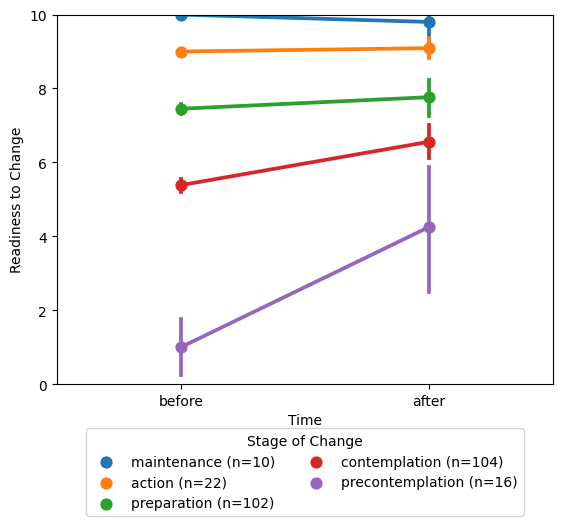

In [ ]:
readiness_user_before_after = pd.melt(readiness_user, id_vars="stage", value_vars=["readiness_to_change_start", "readiness_to_change_end"]).reset_index()

readiness_user_before_after = readiness_user_before_after.replace({"readiness_to_change_start": "before", "readiness_to_change_end": "after"})
readiness_user_before_after.rename(columns={"value": "Readiness to Change", "variable": "Time"}, inplace=True)
readiness_user_before_after = readiness_user_before_after.replace({"readiness_to_change_start": "before", "readiness_to_change_end": "after"})

counts = readiness_user_before_after.stage.value_counts()
legend_labels = [f"{stage} (n={counts[stage]})" for stage in counts.index]

sns.pointplot(readiness_user_before_after, x="Time", y="Readiness to Change", hue="stage", hue_order=["maintenance",
                                                                                                      "action", 
                                                                                                      "preparation",
                                                                                                      "contemplation",
                                                                                                       "precontemplation"])
handles, labels = plt.gca().get_legend().legendHandles, ["maintenance", "action",  "preparation", "contemplation", "precontemplation"]
labels = [f"{label} (n={counts[label]})" for label in labels]
plt.legend(handles=handles, labels=labels, loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2, title="Stage of Change")
plt.ylim(0, 10)
plt.savefig("readiness_change_stages.jpeg", bbox_inches="tight")

<Axes: xlabel='stage', ylabel='Readiness to Change (Delta)'>

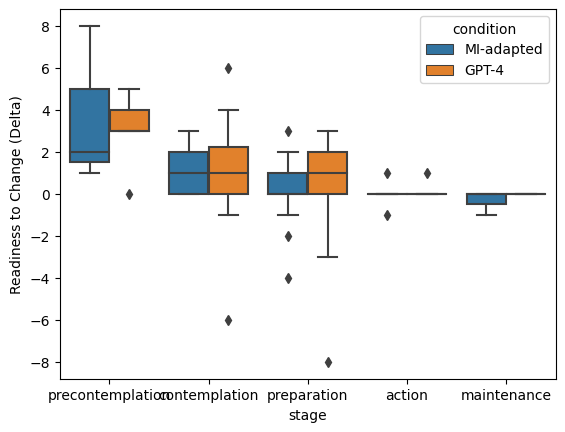

In [ ]:
readiness_user_plt = readiness_user[["condition", "Readiness to Change (Delta)"]].copy()
sns.boxplot(readiness_user, x="stage", y="Readiness to Change (Delta)", hue="condition", order=["precontemplation", "contemplation", "preparation", "action", "maintenance"])
#readiness_user_plt.boxplot(by="condition")

<Axes: xlabel='condition', ylabel='Readiness to Change (Delta)'>

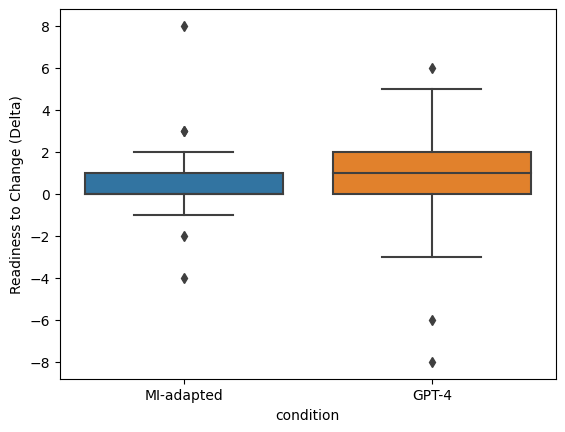

In [ ]:
sns.boxplot(readiness_user_plt, x="condition", y="Readiness to Change (Delta)")

### Plotting results overview

In [ ]:
user_plot = pd.melt(user, id_vars=["condition"], value_vars=["Therapeutic Alliance", "Perception of MI","Perception MI Inadherent", "Readiness to Change (Delta)", "harmful"])
user_plot["variable"].replace({"harmful": "Harmful Outputs"}, inplace=True)
user_plot.tail()
# reverse code Perception MI Inadherent

,condition,variable,value
780,GPT-4,Harmful Outputs,6.0
781,GPT-4,Harmful Outputs,3.0
782,GPT-4,Harmful Outputs,2.0
783,MI-adapted,Harmful Outputs,0.0
784,GPT-4,Harmful Outputs,5.0


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


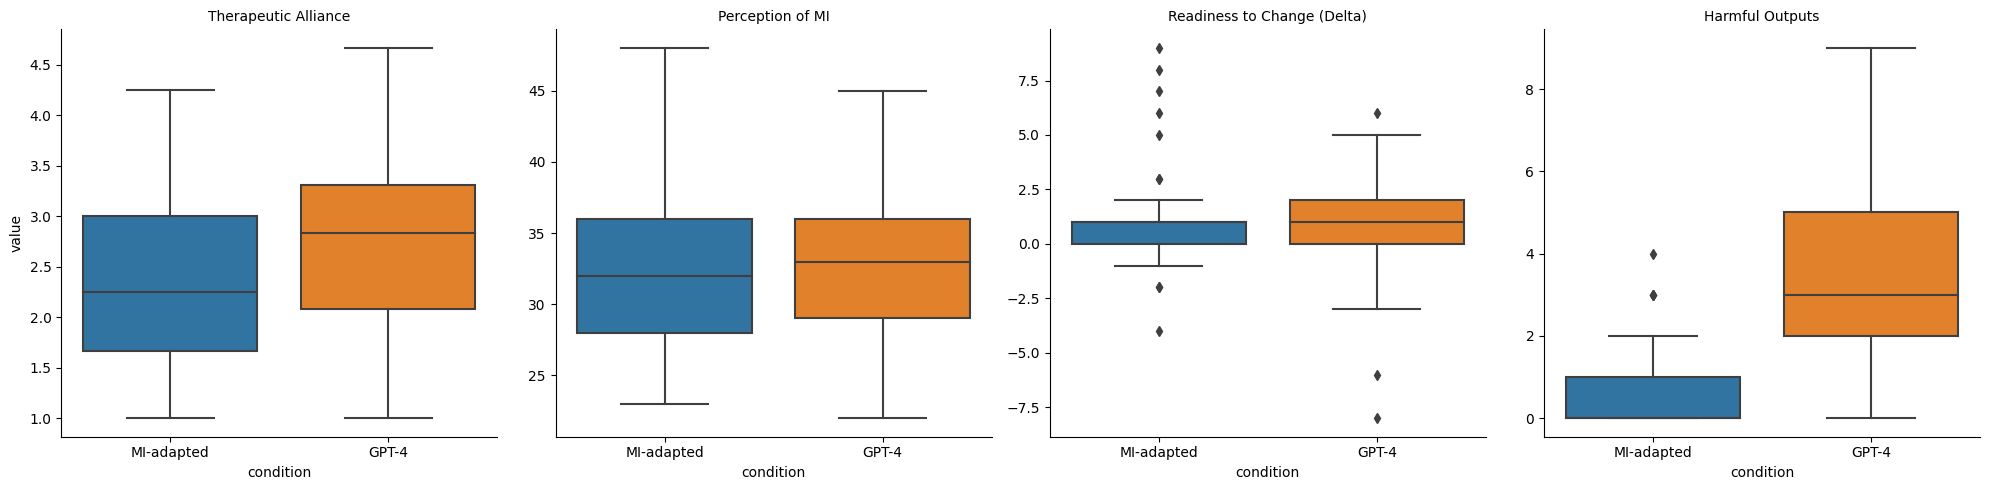

In [ ]:
g = sns.catplot(user_plot[user_plot["variable"] != "Perception MI Inadherent"], x="condition", y="value", kind="box", col="variable", sharey=False)
g.set_titles("{col_name}")
g.savefig("hypotheses_tests.jpeg", bbox_inches="tight")

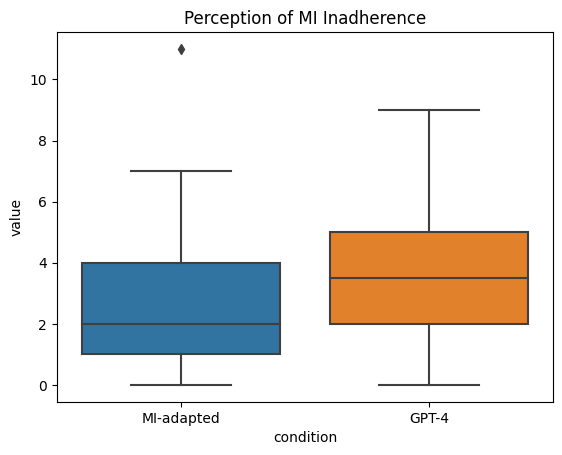

In [ ]:
sns.boxplot(user_plot[user_plot["variable"] == "Perception MI Inadherent"], x = "condition", y="value")
plt.title("Perception of MI Inadherence")
plt.savefig("boxplot_mi_inadherence", bbox_inches="tight")

In [ ]:
user_plot = pd.melt(user, id_vars=["condition"], value_vars=["User Engagement", "Communication Competence", "Perceived Empathy"])
#user_plot["variable"].replace({"harmful": "Harmful Outputs"}, inplace=True)
user_plot.tail()
# reverse code Perception MI Inadherent

,condition,variable,value
466,GPT-4,Perceived Empathy,4.000000
467,GPT-4,Perceived Empathy,4.666667
468,GPT-4,Perceived Empathy,4.666667
469,MI-adapted,Perceived Empathy,1.000000
470,GPT-4,Perceived Empathy,2.666667


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


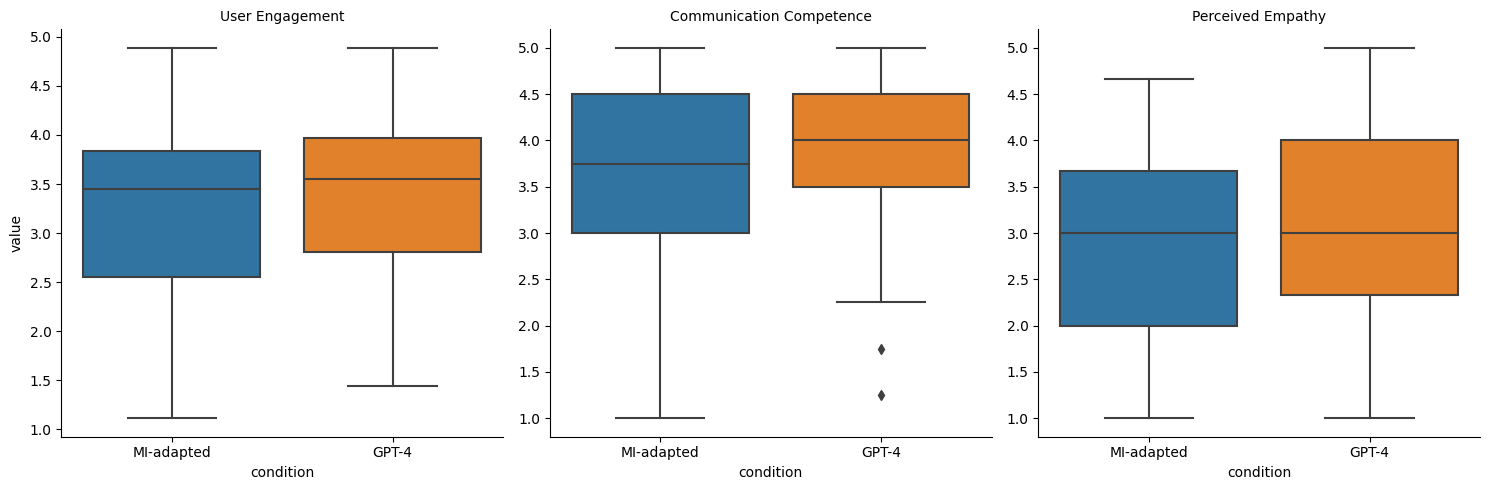

In [ ]:
g = sns.catplot(user_plot, x="condition", y="value", kind="box", col="variable", sharey=False)
g.set_titles("{col_name}")
g.savefig("confounding_vars.jpeg", bbox_inches="tight")

In [ ]:
print(user.columns.to_list())

['Unnamed: 0', 'user_id', 'start_time', 'end_time', 'condition', 'education', 'job', 'identification_with_goal', 'current_pursuit_of_target', 'readiness_to_change_start', 'readiness_to_change_end', 'wai_sr_1', 'wai_sr_2', 'wai_sr_3', 'wai_sr_4', 'wai_sr_5', 'wai_sr_6', 'wai_sr_7', 'wai_sr_8', 'wai_sr_9', 'wai_sr_10', 'wai_sr_11', 'wai_sr_12', 'fa_s1', 'fa_s2', 'fa_s3', 'pu_s1', 'pu_s2', 'pu_s3', 'rw_s1', 'rw_s2', 'rw_s3', 'pm_1', 'pm_2', 'pm_3', 'pm_4', 'pm_5', 'pm_6', 'pm_7', 'pm_8', 'pm_9', 'pm_10', 'pm_11', 'cc_1', 'cc_2', 'cc_3', 'cc_4', 'pe_1', 'pe_2', 'pe_3', 'attention_check', 'Submission id', 'Time taken', 'Total approvals', 'Age', 'Sex', 'Therapeutic Alliance', 'User Engagement', 'Perception of MI', 'Perception MI Inadherent', 'Perceived Empathy', 'Communication Competence', 'Readiness to Change (Delta)', 'stage', 'target_behaviour', 'Cooperative', 'Reflective', 'Pre-informed/finds own solution', 'Next Step developed in chat', 'Chat Succesfull', 'Contained technical issue', 'O

# Behaviour Effects

#### Effects of condition and chosen target behaviour on  behaviour

Reflectiveness:
Chi-Square Statistic: 0.39704328221507174
P-value: 0.528620193073712
Degrees of Freedom: 1
Expected Frequencies Table:
[[35.53846154 41.46153846]
 [36.46153846 42.53846154]]


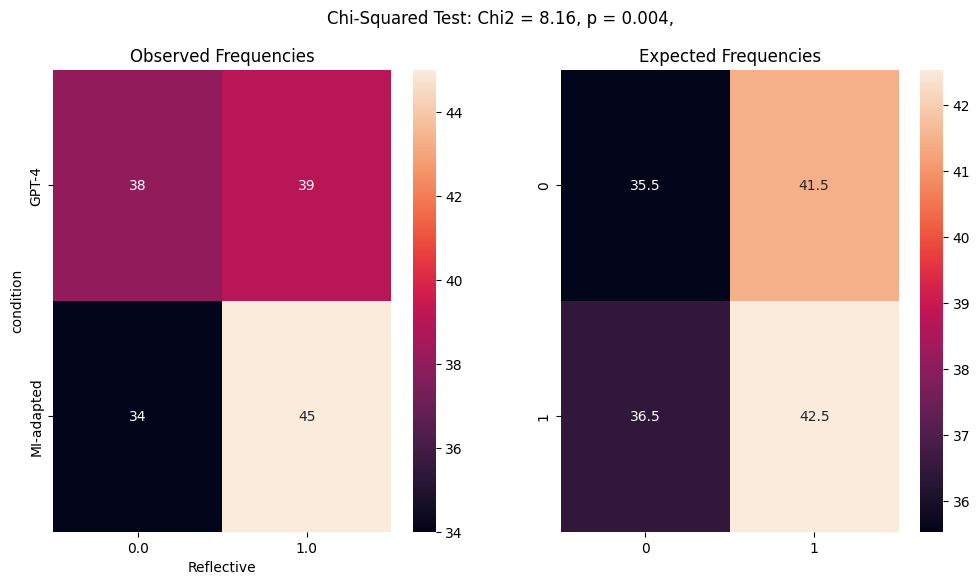

Cooperation:
Chi-Square Statistic: 0.41494441830539563
P-value: 0.519470522250542
Degrees of Freedom: 1
Expected Frequencies Table:
[[19.74358974 57.25641026]
 [20.25641026 58.74358974]]


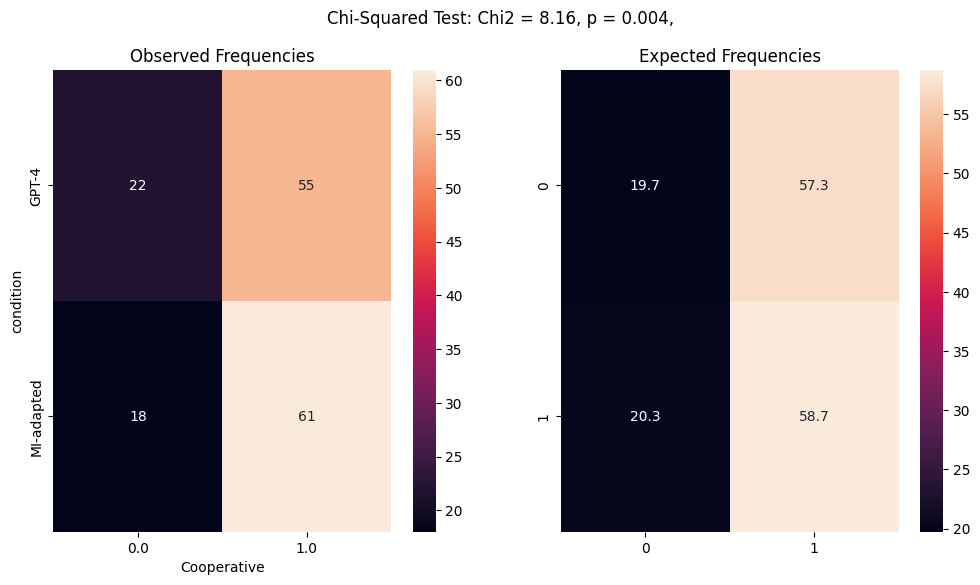

Pre-informedness:
Chi-Square Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 1
Expected Frequencies Table:
[[42.94230769 34.05769231]
 [44.05769231 34.94230769]]


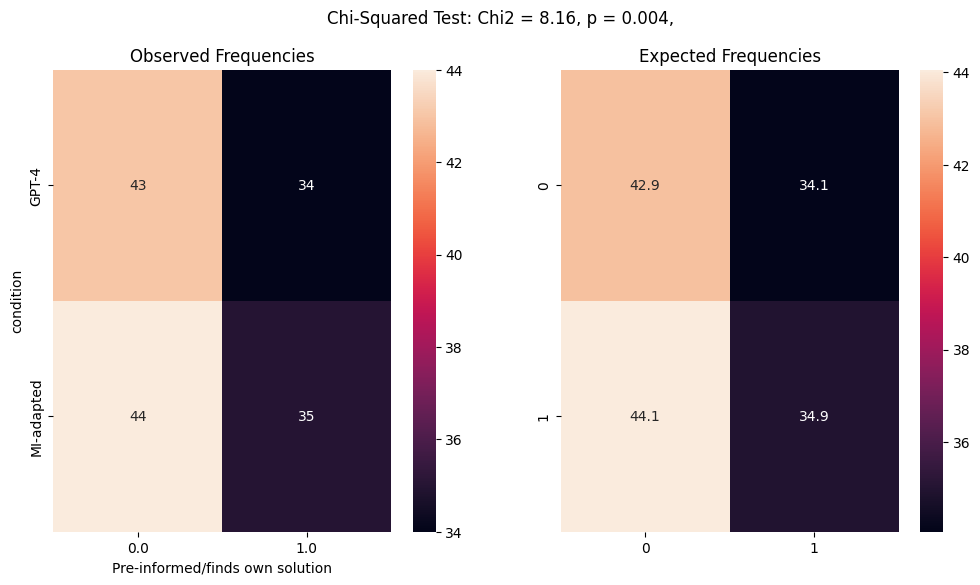

In [ ]:
print("Reflectiveness:")
calculate_chi2(user['condition'], user["Reflective"])

print("Cooperation:")
calculate_chi2(user['condition'], user["Cooperative"])

print("Pre-informedness:")
calculate_chi2(user['condition'], user["Pre-informed/finds own solution"])

Reflectiveness:
Chi-Square Statistic: 0.6829970893087794
P-value: 0.7107045019397826
Degrees of Freedom: 2
Expected Frequencies Table:
[[21.69230769 25.30769231]
 [ 5.53846154  6.46153846]
 [44.76923077 52.23076923]]


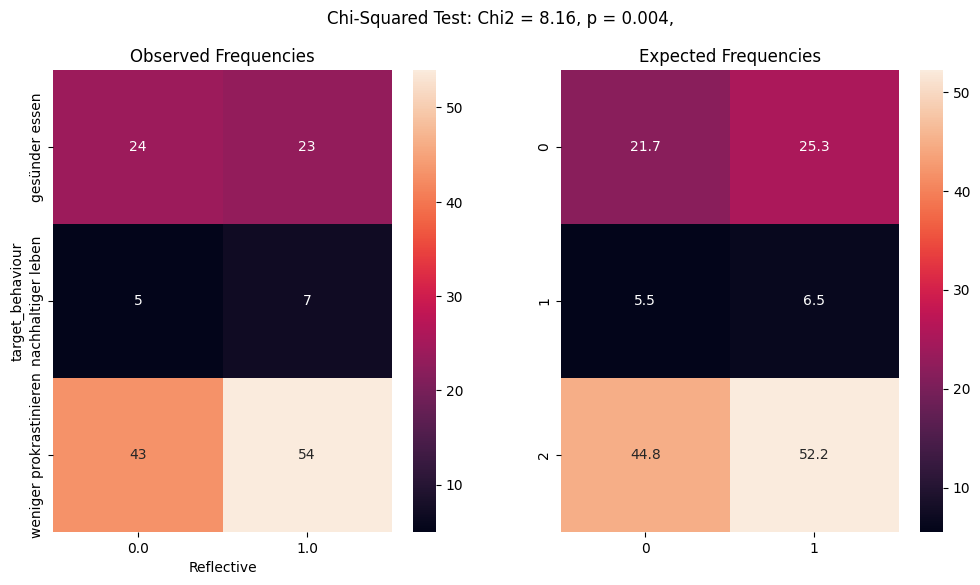

Cooperation:
Chi-Square Statistic: 1.7808051145517394
P-value: 0.41049047356059987
Degrees of Freedom: 2
Expected Frequencies Table:
[[12.05128205 34.94871795]
 [ 3.07692308  8.92307692]
 [24.87179487 72.12820513]]


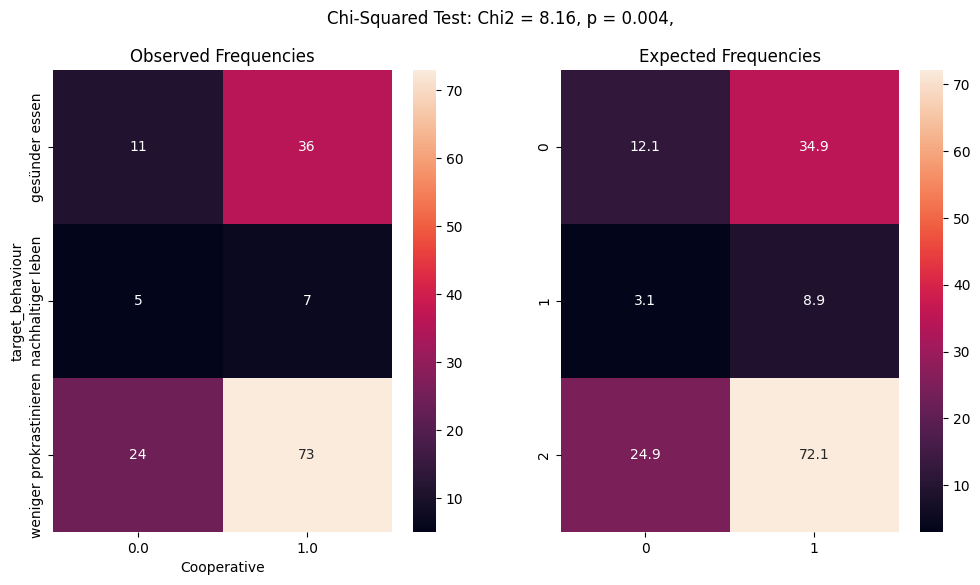

Pre-informedness:
Chi-Square Statistic: 0.4400120624048578
P-value: 0.8025139578237509
Degrees of Freedom: 2
Expected Frequencies Table:
[[26.21153846 20.78846154]
 [ 6.69230769  5.30769231]
 [54.09615385 42.90384615]]


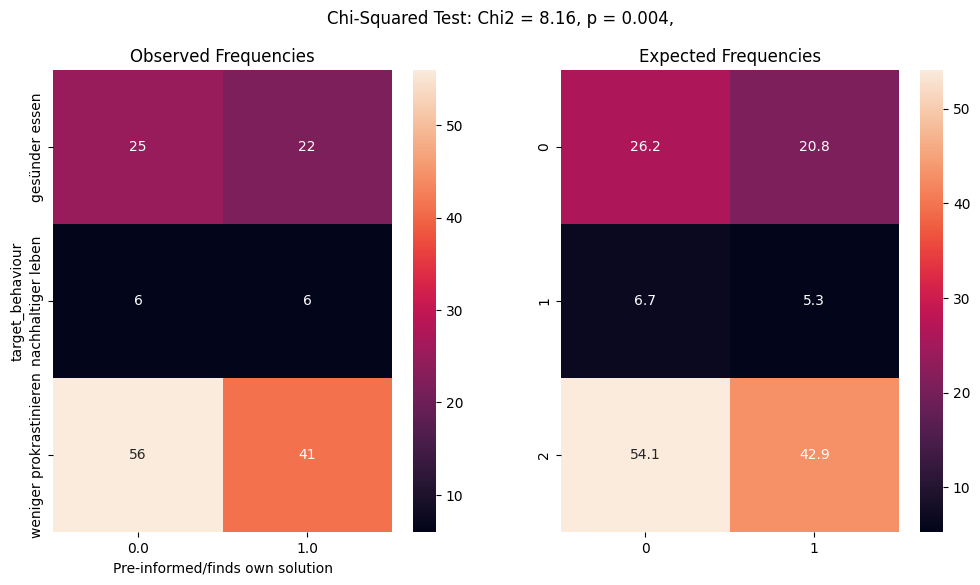

In [ ]:
print("Reflectiveness:")
calculate_chi2(user['target_behaviour'], user["Reflective"])

print("Cooperation:")
calculate_chi2(user['target_behaviour'], user["Cooperative"])

print("Pre-informedness:")
calculate_chi2(user['target_behaviour'], user["Pre-informed/finds own solution"])

#### Behaviour and Delta Readiness to Change

In [ ]:
pg.normality(data=user, dv="Readiness to Change (Delta)", group="Reflective")

,W,pval,normal
Reflective,,,
0.0,0.842953,3.478586e-07,False
1.0,0.857701,1.739999e-07,False


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["Readiness to Change (Delta)"]]
non_reflective = non_reflective[["Readiness to Change (Delta)"]]

In [ ]:
pg.mwu(x=reflective, y=non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3623.5,greater,0.008804,-0.215124,0.607562


In [ ]:
user["Readiness Increase"] = np.where(user["Readiness to Change (Delta)"] > 0, "Yes", "No")

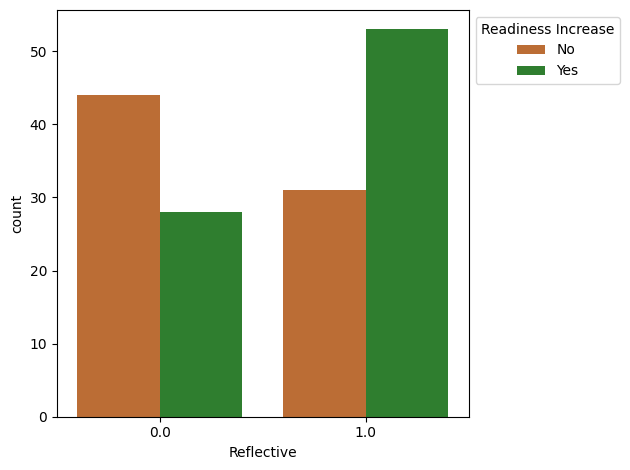

In [ ]:
import matplotlib.pyplot as plt
hue_colors = {"No": "chocolate", "Yes": "forestgreen"}
sns.countplot(data=user, x="Reflective", hue="Readiness Increase", palette=hue_colors)

# Move the legend to the upper right next to the main plot
plt.legend(title='Readiness Increase', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [ ]:
user.columns

Index(['Unnamed: 0', 'user_id', 'start_time', 'end_time', 'condition',
       'education', 'job', 'identification_with_goal',
       'current_pursuit_of_target', 'readiness_to_change_start',
       'readiness_to_change_end', 'wai_sr_1', 'wai_sr_2', 'wai_sr_3',
       'wai_sr_4', 'wai_sr_5', 'wai_sr_6', 'wai_sr_7', 'wai_sr_8', 'wai_sr_9',
       'wai_sr_10', 'wai_sr_11', 'wai_sr_12', 'fa_s1', 'fa_s2', 'fa_s3',
       'pu_s1', 'pu_s2', 'pu_s3', 'rw_s1', 'rw_s2', 'rw_s3', 'pm_1', 'pm_2',
       'pm_3', 'pm_4', 'pm_5', 'pm_6', 'pm_7', 'pm_8', 'pm_9', 'pm_10',
       'pm_11', 'cc_1', 'cc_2', 'cc_3', 'cc_4', 'pe_1', 'pe_2', 'pe_3',
       'attention_check', 'Submission id', 'Time taken', 'Total approvals',
       'Age', 'Sex', 'Therapeutic Alliance', 'User Engagement',
       'Perception of MI', 'Perception MI Inadherent', 'Perceived Empathy',
       'Communication Competence', 'Readiness to Change (Delta)', 'stage',
       'target_behaviour', 'Cooperative', 'Reflective',
       'Pre-informe

#### Utterance Types

##### Next Steps

In [ ]:
turns = pd.read_csv("Main_Study/turns_reclassified_with_prefilter_context.csv")
next_steps = turns[turns["bot_action"] == "Goodbye"].copy()
next_steps.rename(columns={"valence_new": "next_step_valence", "label_new": "next_step_label",
                           "sublabel_new": "next_step_sublabel", "code": "next_step_code"}, inplace=True)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'condition', 'chat_id',
       'user_id', 'target_behaviour', 'readiness_to_change_start',
       'utterance_id', 'turn_id', 'datetime', 'user_utterance', 'valence',
       'valence_score', 'label', 'label_score', 'sublabel', 'sublabel_score',
       'bot_action', 'bot_datetime', 'bot_utterance', 'user_rating',
       'user_rating_explanation', 'user_word_count', 'prefilter',
       'valence_new', 'label_new', 'sublabel_new', 'code'],
      dtype='object')

In [ ]:
user = pd.merge(user, next_steps[["chat_id", "next_step_valence", "next_step_label", 
                                  "next_step_sublabel", "next_step_code"]], on="chat_id")

Chi-Square Statistic: 23.17313343328336
P-value: 9.29004913026561e-06
Degrees of Freedom: 2
Expected Frequencies Table:
[[27.88461538 22.11538462]
 [58.         46.        ]
 [ 1.11538462  0.88461538]]


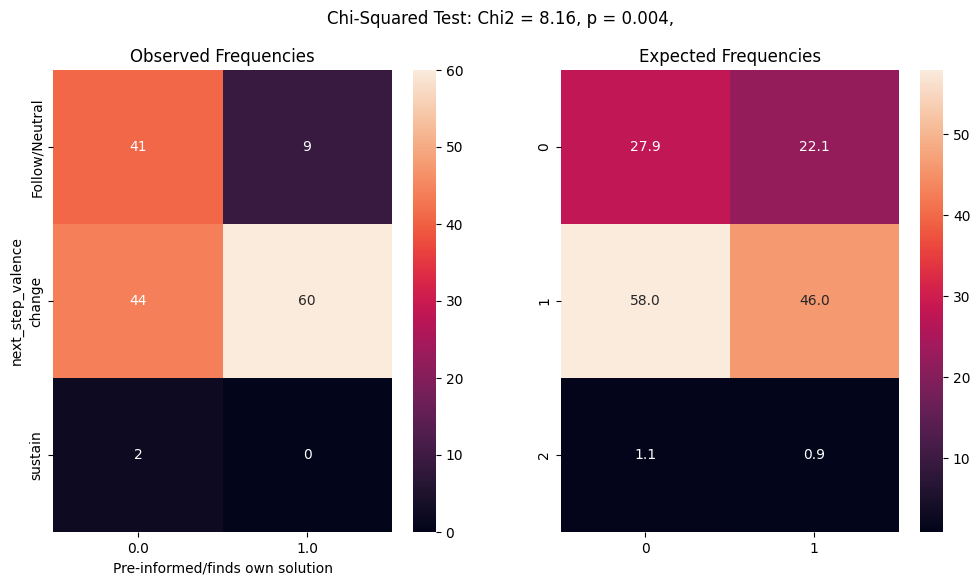

Chi-Square Statistic: 11.42834482758621
P-value: 0.003298879499438375
Degrees of Freedom: 2
Expected Frequencies Table:
[[12.82051282 37.17948718]
 [26.66666667 77.33333333]
 [ 0.51282051  1.48717949]]


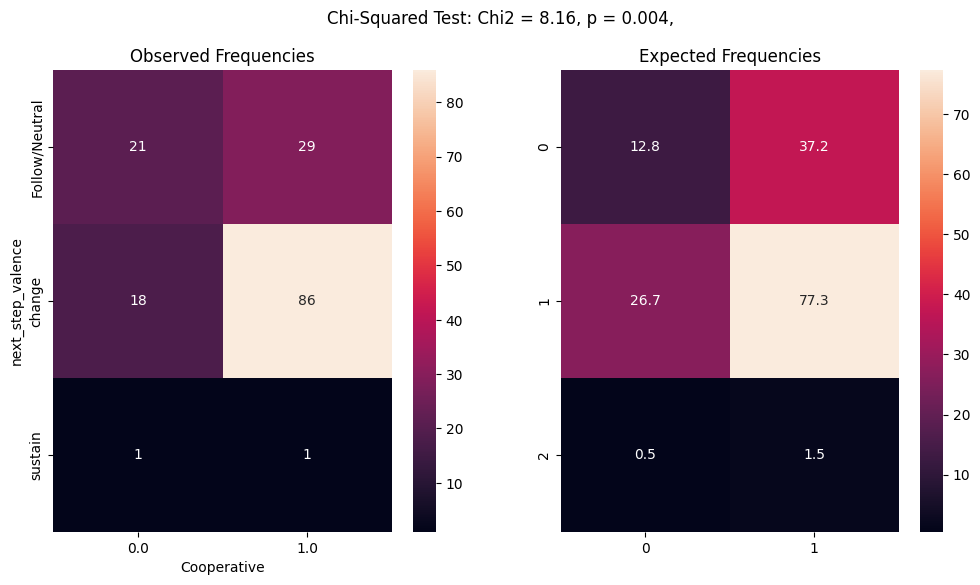

Chi-Square Statistic: 7.54
P-value: 0.023052063287225574
Degrees of Freedom: 2
Expected Frequencies Table:
[[23.07692308 26.92307692]
 [48.         56.        ]
 [ 0.92307692  1.07692308]]


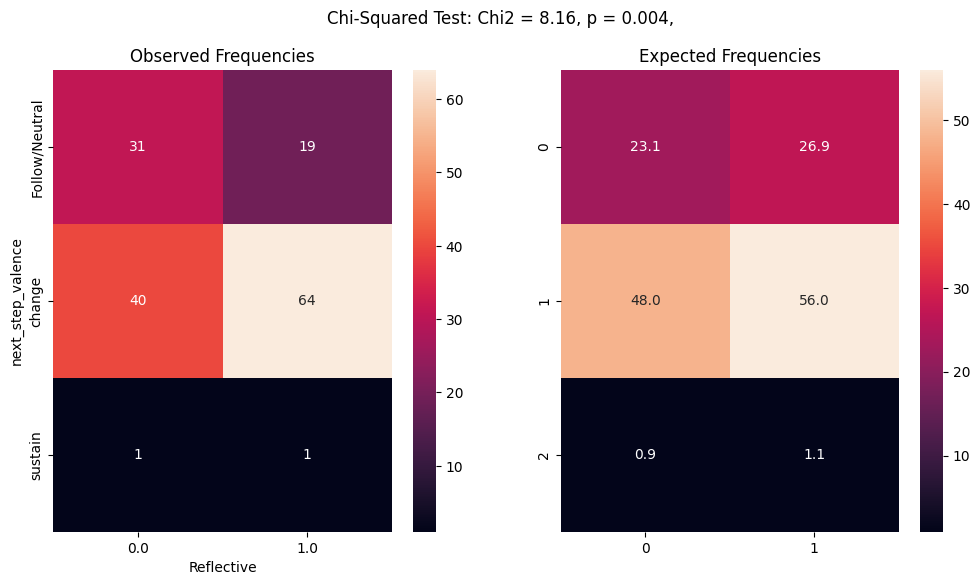

In [ ]:
calculate_chi2(user["next_step_valence"], user["Pre-informed/finds own solution"])
calculate_chi2(user["next_step_valence"], user["Cooperative"])
calculate_chi2(user["next_step_valence"], user["Reflective"])

##### Change Talk Overall

In [ ]:
user["change_talk_ratio"] = user["change"] / (user["change"] + user["sustain"] + user["Follow/Neutral"])
user["sustain_talk_ratio"] = user["sustain"] / (user["change"] + user["sustain"] + user["Follow/Neutral"])

In [ ]:
print(pg.normality(data=user, dv="change_talk_ratio", group="Reflective"))
print(pg.normality(data=user, dv="change_talk_ratio", group="Cooperative"))
pg.normality(data=user, dv="change_talk_ratio", group="Pre-informed/finds own solution")

                   W      pval  normal
Reflective                            
0.0         0.937931  0.001492   False
1.0         0.958791  0.008832   False
                    W      pval  normal
Cooperative                            
1.0          0.963478  0.003009   False
0.0          0.952260  0.090719    True


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.944361,0.000961,False
1.0,0.949041,0.006976,False


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["change_talk_ratio"]]
non_reflective = non_reflective[["change_talk_ratio"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,4135.0,greater,0.000032,-0.367394,0.683697


In [ ]:
reflective = user[user["Cooperative"] == 1]
non_reflective = user[user["Cooperative"] == 0]

reflective = reflective[["change_talk_ratio"]]
non_reflective = non_reflective[["change_talk_ratio"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3499.5,greater,6.393415e-07,-0.508405,0.754203


In [ ]:
reflective = user[user["Pre-informed/finds own solution"] == 1]
non_reflective = user[user["Pre-informed/finds own solution"] == 0]

reflective = reflective[["change_talk_ratio"]]
non_reflective = non_reflective[["change_talk_ratio"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,4806.5,greater,3.590631e-11,-0.601366,0.800683


In [ ]:
user.groupby("Pre-informed/finds own solution")[["sustain_talk_ratio"]].describe()

sustain_talk_ratio                           \
                                             count      mean       std  min   
Pre-informed/finds own solution                                               
0.0                                           87.0  0.142720  0.132215  0.0   
1.0                                           69.0  0.106481  0.099833  0.0   

                                                                    
                                 25%       50%       75%       max  
Pre-informed/finds own solution                                     
0.0                              0.0  0.111111  0.222222  0.555556  
1.0                              0.0  0.111111  0.222222  0.333333

In [ ]:
talk_ratios = pd.melt(user, id_vars=["change_talk_ratio", "sustain_talk_ratio"], 
                      value_vars=["Reflective", "Cooperative", "Pre-informed/finds own solution"])

talk_ratios.rename(columns={"variable": "Behaviour", "value": "is_present"}, inplace=True)

talk_ratios = pd.melt(talk_ratios, id_vars=["Behaviour", "is_present"], 
                      value_vars=["change_talk_ratio", "sustain_talk_ratio"])
talk_ratios.head()

,Behaviour,is_present,variable,value
0,Reflective,0.0,change_talk_ratio,0.444444
1,Reflective,1.0,change_talk_ratio,0.444444
2,Reflective,1.0,change_talk_ratio,0.666667
3,Reflective,0.0,change_talk_ratio,0.333333
4,Reflective,1.0,change_talk_ratio,0.444444


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


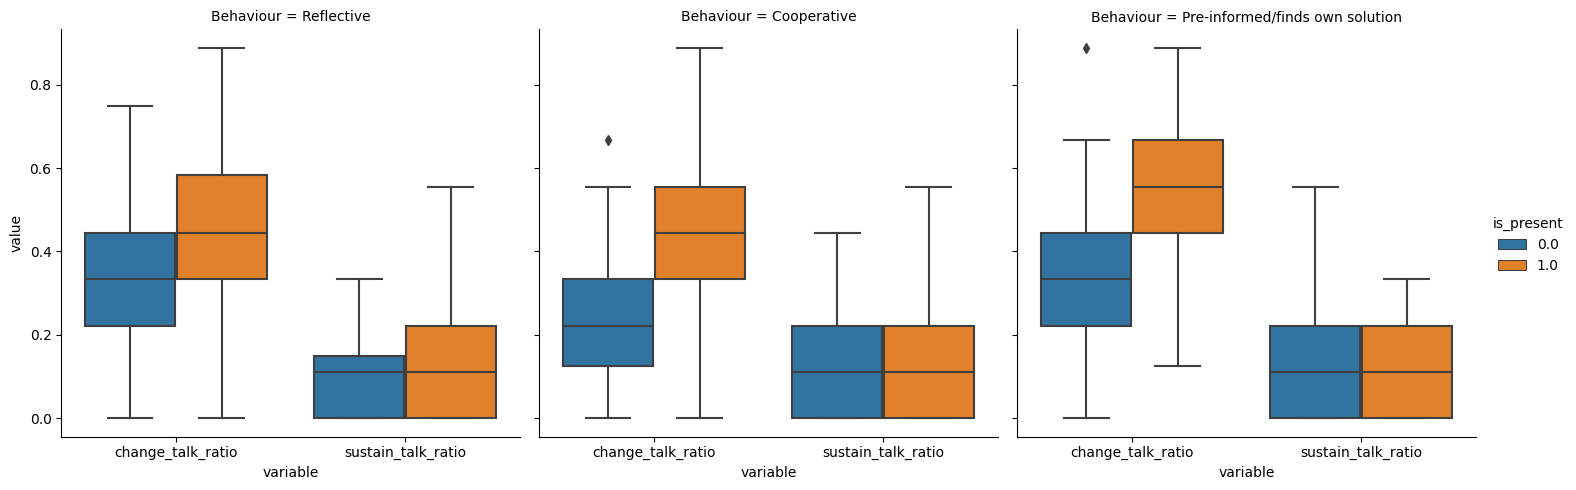

In [ ]:
sns.catplot(talk_ratios, x="variable", y="value", hue="is_present", col="Behaviour", kind="box")

##### Identification and Current Pursuit of Target

In [ ]:
motivation = pd.melt(user, id_vars=["current_pursuit_of_target", "identification_with_goal", "readiness_to_change_start"], 
                      value_vars=["Reflective", "Cooperative", "Pre-informed/finds own solution"])

motivation.rename(columns={"variable": "Behaviour", "value": "is_present"}, inplace=True)

motivation = pd.melt(motivation, id_vars=["Behaviour", "is_present"], 
                      value_vars=["current_pursuit_of_target", "identification_with_goal", "readiness_to_change_start"])
motivation.head()

,Behaviour,is_present,variable,value
0,Reflective,0.0,current_pursuit_of_target,8.0
1,Reflective,1.0,current_pursuit_of_target,10.0
2,Reflective,1.0,current_pursuit_of_target,9.0
3,Reflective,0.0,current_pursuit_of_target,9.0
4,Reflective,1.0,current_pursuit_of_target,5.0


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


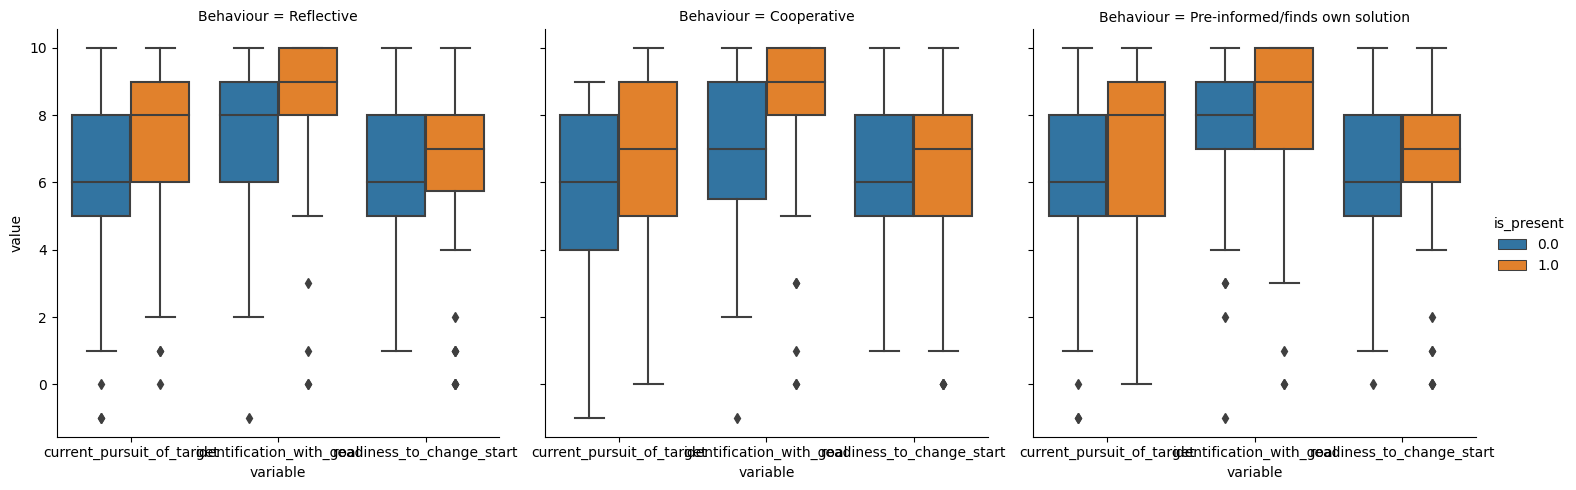

In [ ]:
sns.catplot(motivation, x="variable", y="value", hue="is_present", col="Behaviour", kind="box")

In [ ]:
print(pg.normality(data=user, dv="current_pursuit_of_target", group="Reflective"))
print(pg.normality(data=user, dv="current_pursuit_of_target", group="Cooperative"))
pg.normality(data=user, dv="current_pursuit_of_target", group="Pre-informed/finds own solution")

                   W      pval  normal
Reflective                            
0.0         0.934972  0.001169   False
1.0         0.888758  0.000003   False
                    W      pval  normal
Cooperative                            
1.0          0.920954  0.000004   False
0.0          0.923933  0.011536   False


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.925565,0.00010,False
1.0,0.882557,0.00001,False


In [ ]:
print(pg.normality(data=user, dv="identification_with_goal", group="Reflective"))
print(pg.normality(data=user, dv="identification_with_goal", group="Cooperative"))
pg.normality(data=user, dv="identification_with_goal", group="Pre-informed/finds own solution")

                   W          pval  normal
Reflective                                
0.0         0.889494  1.348737e-05   False
1.0         0.711358  1.472278e-11   False
                    W          pval  normal
Cooperative                                
1.0          0.766886  2.749393e-12   False
0.0          0.905266  3.134393e-03   False


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.855324,1.102148e-07,False
1.0,0.747042,1.426454e-09,False


In [ ]:
print(pg.normality(data=user, dv="readiness_to_change_start", group="Reflective"))
print(pg.normality(data=user, dv="readiness_to_change_start", group="Cooperative"))
pg.normality(data=user, dv="readiness_to_change_start", group="Pre-informed/finds own solution")

                   W      pval  normal
Reflective                            
0.0         0.945715  0.004017   False
1.0         0.880971  0.000001   False
                    W          pval  normal
Cooperative                                
1.0          0.905638  5.592776e-07   False
0.0          0.942188  4.497838e-02   False


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.929928,0.000168,False
1.0,0.892095,0.000022,False


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["current_pursuit_of_target"]]
non_reflective = non_reflective[["current_pursuit_of_target"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3905.0,greater,0.00041,-0.309524,0.654762


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["identification_with_goal"]]
non_reflective = non_reflective[["identification_with_goal"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3886.0,greater,0.00045,-0.303152,0.651576


In [ ]:
reflective = user[user["Cooperative"] == 1]
non_reflective = user[user["Cooperative"] == 0]

reflective = reflective[["current_pursuit_of_target"]]
non_reflective = non_reflective[["current_pursuit_of_target"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,2967.0,greater,0.001675,-0.311671,0.655836


In [ ]:
reflective = user[user["Cooperative"] == 1]
non_reflective = user[user["Cooperative"] == 0]

reflective = reflective[["identification_with_goal"]]
non_reflective = non_reflective[["identification_with_goal"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,2979.0,greater,0.001252,-0.316976,0.658488


In [ ]:
reflective = user[user["Pre-informed/finds own solution"] == 1]
non_reflective = user[user["Pre-informed/finds own solution"] == 0]

reflective = reflective[["current_pursuit_of_target"]]
non_reflective = non_reflective[["current_pursuit_of_target"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3749.5,greater,0.002233,-0.263734,0.631867


In [ ]:
reflective = user[user["Pre-informed/finds own solution"] == 1]
non_reflective = user[user["Pre-informed/finds own solution"] == 0]

reflective = reflective[["identification_with_goal"]]
non_reflective = non_reflective[["identification_with_goal"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3401.0,greater,0.055142,-0.146276,0.573138


In [ ]:
user.to_csv("Consolidated_Data/user_preprocessed_with_demographics_added.csv")

#### User Engagement, Communication Competence, Empathy By Behaviour

/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


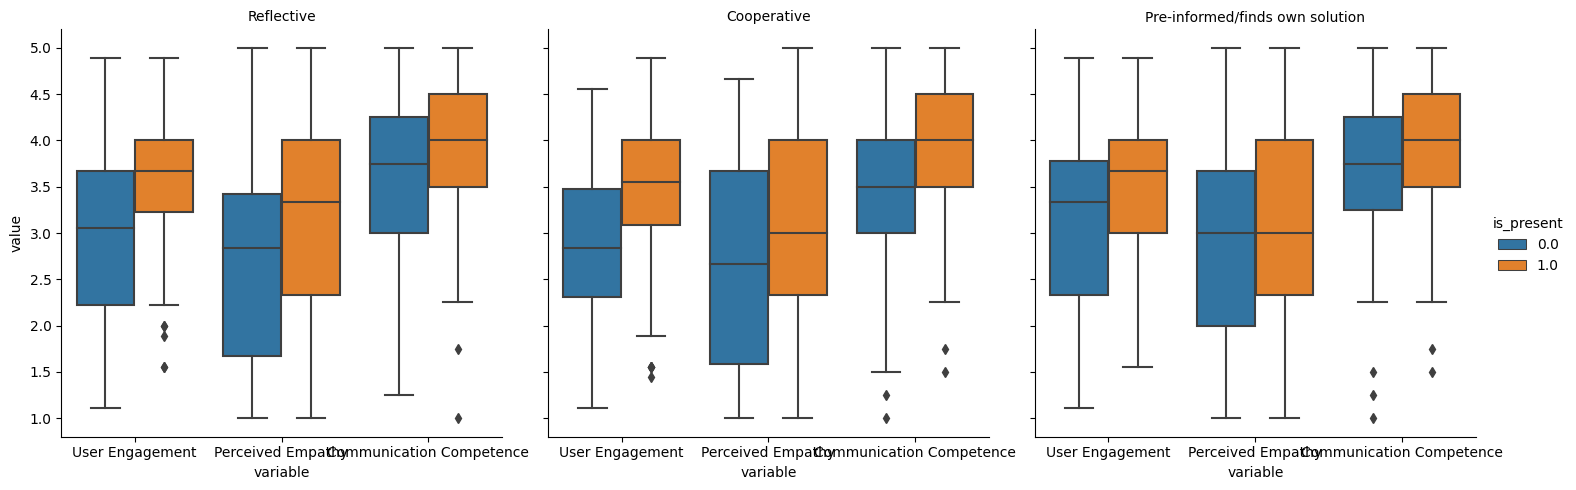

In [ ]:
motivation = pd.melt(user, id_vars=['User Engagement','Perceived Empathy','Communication Competence'], 
                      value_vars=["Reflective", "Cooperative", "Pre-informed/finds own solution"])

motivation.rename(columns={"variable": "Behaviour", "value": "is_present"}, inplace=True)

motivation = pd.melt(motivation, id_vars=["Behaviour", "is_present"], 
                      value_vars=['User Engagement','Perceived Empathy','Communication Competence'])

g = sns.catplot(motivation, x="variable", y="value", hue="is_present", col="Behaviour", kind="box")
g.set_titles("{col_name}")

In [ ]:
print(pg.normality(data=user, dv="User Engagement", group="Reflective"))
print(pg.normality(data=user, dv="User Engagement", group="Cooperative"))
pg.normality(data=user, dv="User Engagement", group="Pre-informed/finds own solution")

                  W      pval  normal
Reflective                           
0.0         0.97482  0.157632    True
1.0         0.94397  0.001153   False
                    W      pval  normal
Cooperative                            
1.0          0.937943  0.000042   False
0.0          0.984259  0.840989    True


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.963002,0.013773,False
1.0,0.953021,0.011250,False


In [ ]:
print(pg.normality(data=user, dv="Perceived Empathy", group="Reflective"))
print(pg.normality(data=user, dv="Perceived Empathy", group="Cooperative"))
pg.normality(data=user, dv="Perceived Empathy", group="Pre-informed/finds own solution")

                   W      pval  normal
Reflective                            
0.0         0.930972  0.000685   False
1.0         0.943327  0.001061   False
                    W      pval  normal
Cooperative                            
1.0          0.948929  0.000236   False
0.0          0.909093  0.003554   False


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.934547,0.000271,False
1.0,0.944210,0.003962,False


In [ ]:
print(pg.normality(data=user, dv="Communication Competence", group="Reflective"))
print(pg.normality(data=user, dv="Communication Competence", group="Cooperative"))
pg.normality(data=user, dv="Communication Competence", group="Pre-informed/finds own solution")

                   W      pval  normal
Reflective                            
0.0         0.961711  0.027612   False
1.0         0.924831  0.000111   False
                    W      pval  normal
Cooperative                            
1.0          0.942745  0.000088   False
0.0          0.947125  0.060408    True


,W,pval,normal
Pre-informed/finds own solution,,,
0.0,0.957350,0.005924,False
1.0,0.921627,0.000345,False


In [ ]:
reflective = user[user["Pre-informed/finds own solution"] == 1]
non_reflective = user[user["Pre-informed/finds own solution"] == 0]

reflective = reflective[["User Engagement"]]
non_reflective = non_reflective[["User Engagement"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3674.0,greater,0.008174,-0.224055,0.612027


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["User Engagement"]]
non_reflective = non_reflective[["User Engagement"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,4115.5,greater,0.000051,-0.360946,0.680473


In [ ]:
reflective = user[user["Cooperative"] == 1]
non_reflective = user[user["Cooperative"] == 0]

reflective = reflective[["User Engagement"]]
non_reflective = non_reflective[["User Engagement"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3244.5,greater,0.000087,-0.398491,0.699246


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["Perceived Empathy"]]
non_reflective = non_reflective[["Perceived Empathy"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3739.5,greater,0.005272,-0.236607,0.618304


In [ ]:
reflective = user[user["Reflective"] == 1]
non_reflective = user[user["Reflective"] == 0]

reflective = reflective[["Communication Competence"]]
non_reflective = non_reflective[["Communication Competence"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,3690.5,greater,0.00863,-0.220403,0.610202


In [ ]:
reflective = user[user["Cooperative"] == 1]
non_reflective = user[user["Cooperative"] == 0]

reflective = reflective[["Communication Competence"]]
non_reflective = non_reflective[["Communication Competence"]]

pg.mwu(reflective, non_reflective, alternative="greater")

,U-val,alternative,p-val,RBC,CLES
MWU,2967.0,greater,0.004159,-0.278879,0.63944


# Utterance Type Effects - Additional Analyses

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["identification_with_goal"], value_vars=['Rd+', 'FN', 'R_+', 'C+',
       'Ra+', 'R_-', 'TS-', 'TS+', 'Rd-', 'Ra-', 'Rn+', 'Rn-', 'C-'])
conditions = [
    utterance_readiness['variable'].isin(["R_+", "Rd+", "Ra+", "Rn+", "C+", "TS+"]),
    utterance_readiness['variable'].isin(["R_-", "Rd-", "Ra-", "Rn-", "C-", "TS-"])
]

# Choices corresponding to the conditions
choices = ['Change', 'Sustain']

# Adding new column 'Valence' with conditions applied
utterance_readiness['Valence'] = np.select(conditions, choices, default='FN')
utterance_readiness.head()

,identification_with_goal,variable,value,Valence
0,8.0,Rd+,1.0,Change
1,10.0,Rd+,0.0,Change
2,10.0,Rd+,0.0,Change
3,10.0,Rd+,1.0,Change
4,6.0,Rd+,0.0,Change


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


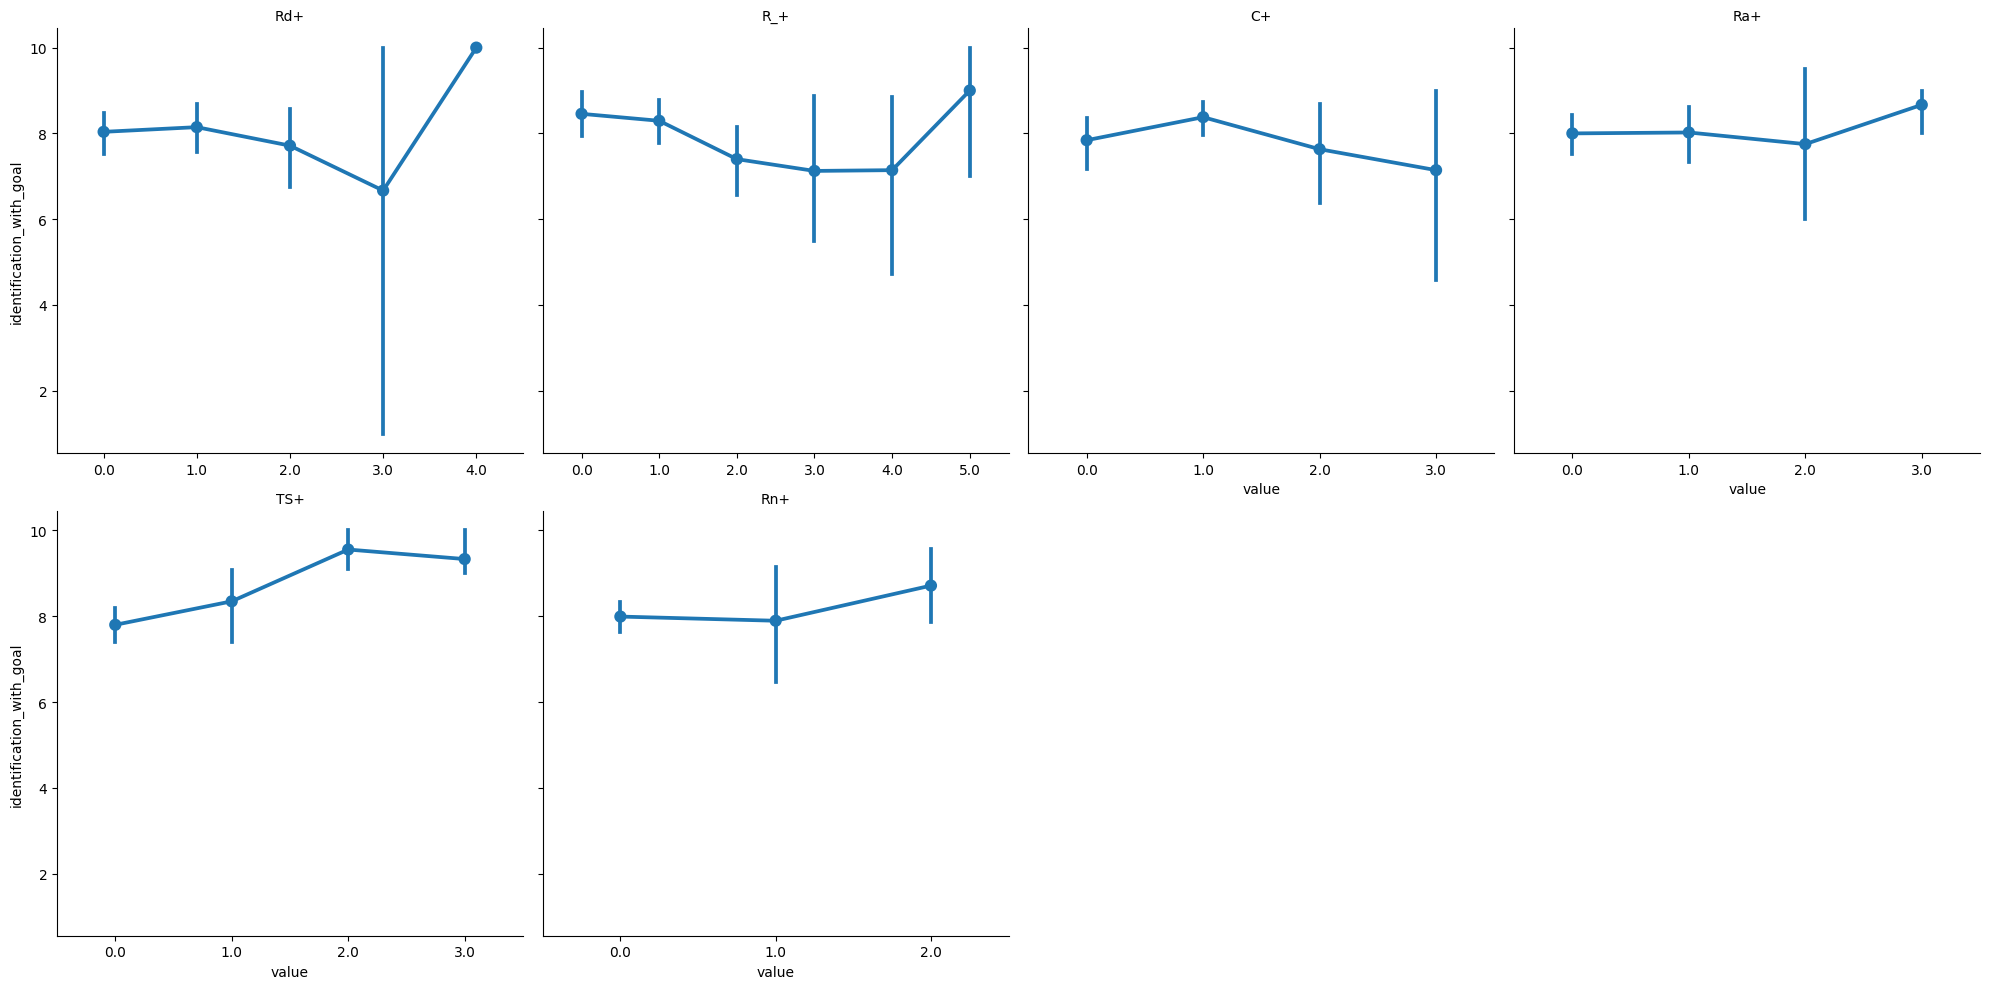

In [ ]:
g = sns.catplot(utterance_readiness[utterance_readiness["Valence"] == "Change"], x="value", y="identification_with_goal", col="variable", kind="point", 
            col_wrap=4, sharex=False)
            #facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


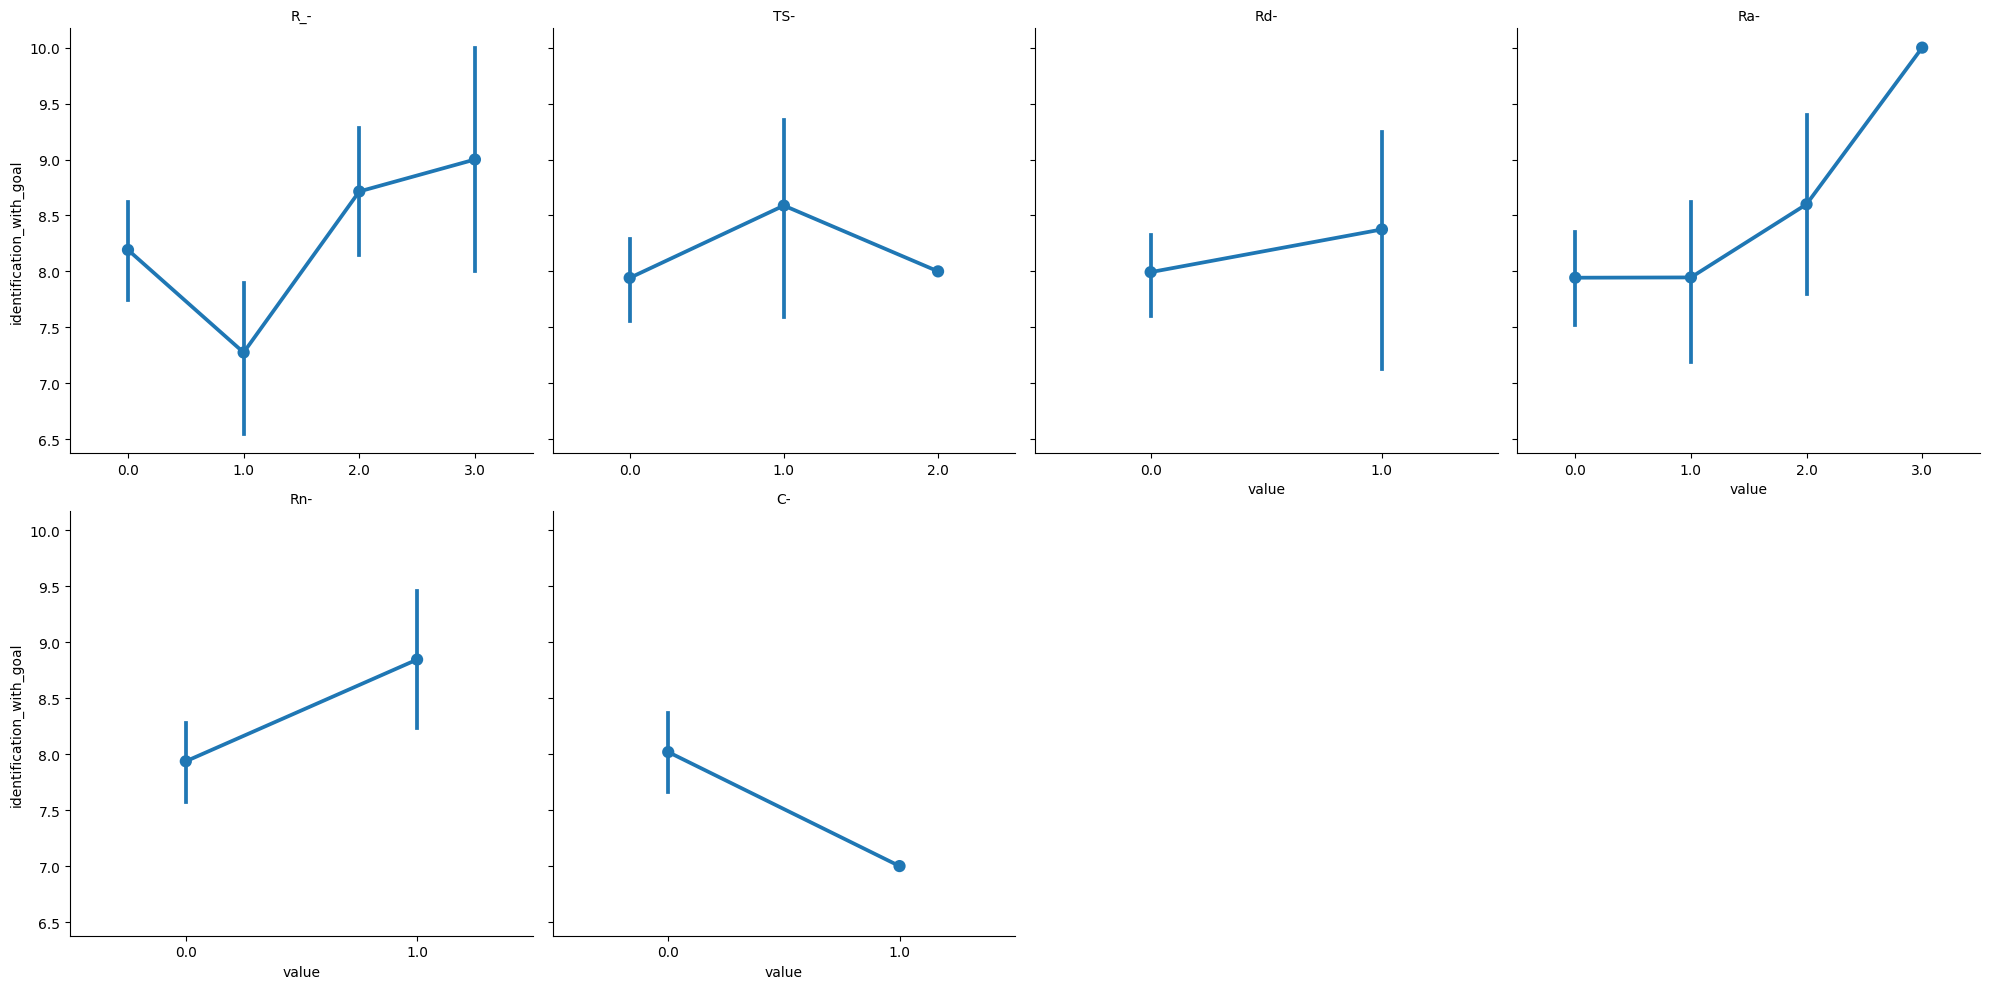

In [ ]:
g = sns.catplot(utterance_readiness[utterance_readiness["Valence"] == "Sustain"], x="value", y="identification_with_goal", col="variable", kind="point", 
            col_wrap=4, sharex=False)
            #facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["Readiness to Change (Delta)"], value_vars=['Rd+', 'FN', 'R_+', 'C+',
       'Ra+', 'R_-', 'TS-', 'TS+', 'Rd-', 'Ra-', 'Rn+', 'Rn-', 'C-'])
conditions = [
    utterance_readiness['variable'].isin(["R_+", "Rd+", "Ra+", "Rn+", "C+", "TS+"]),
    utterance_readiness['variable'].isin(["R_-", "Rd-", "Ra-", "Rn-", "C-", "TS-"])
]

# Choices corresponding to the conditions
choices = ['Change', 'Sustain']

# Adding new column 'Valence' with conditions applied
utterance_readiness['Valence'] = np.select(conditions, choices, default='FN')
utterance_readiness.head()

<Axes: xlabel='presence', ylabel='Readiness to Change (Delta)'>

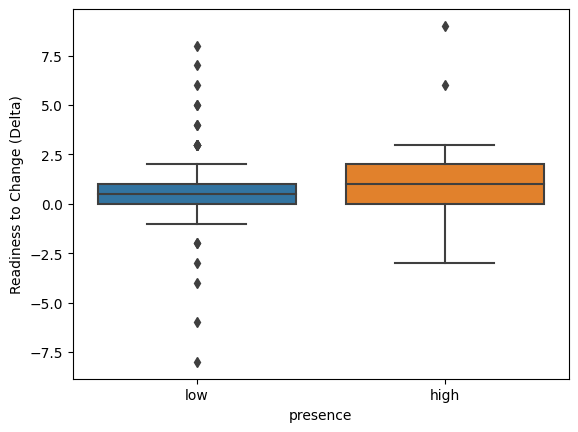

In [ ]:
ra_change = utterance_readiness[utterance_readiness["variable"] == "C+"].copy()
conditions = [
    ra_change['value']>ra_change.value.median(),
    ra_change['value']<=ra_change.value.median(),
]

choices = ['high', 'low']

ra_change["presence"] = np.select(conditions, choices, default='low')
sns.boxplot(ra_change, x="presence", y="Readiness to Change (Delta)")

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["Reflective"], value_vars=['Rd+', 'FN', 'R_+', 'C+',
       'Ra+', 'R_-', 'TS-', 'TS+', 'Rd-', 'Ra-', 'Rn+', 'Rn-', 'C-'])
conditions = [
    utterance_readiness['variable'].isin(["R_+", "Rd+", "Ra+", "Rn+", "C+", "TS+"]),
    utterance_readiness['variable'].isin(["R_-", "Rd-", "Ra-", "Rn-", "C-", "TS-"])
]

# Choices corresponding to the conditions
choices = ['Change', 'Sustain']

# Adding new column 'Valence' with conditions applied
utterance_readiness['Valence'] = np.select(conditions, choices, default='FN')
utterance_readiness.head()

,Reflective,variable,value,Valence
0,0.0,Rd+,1.0,Change
1,1.0,Rd+,0.0,Change
2,1.0,Rd+,0.0,Change
3,0.0,Rd+,1.0,Change
4,1.0,Rd+,0.0,Change


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


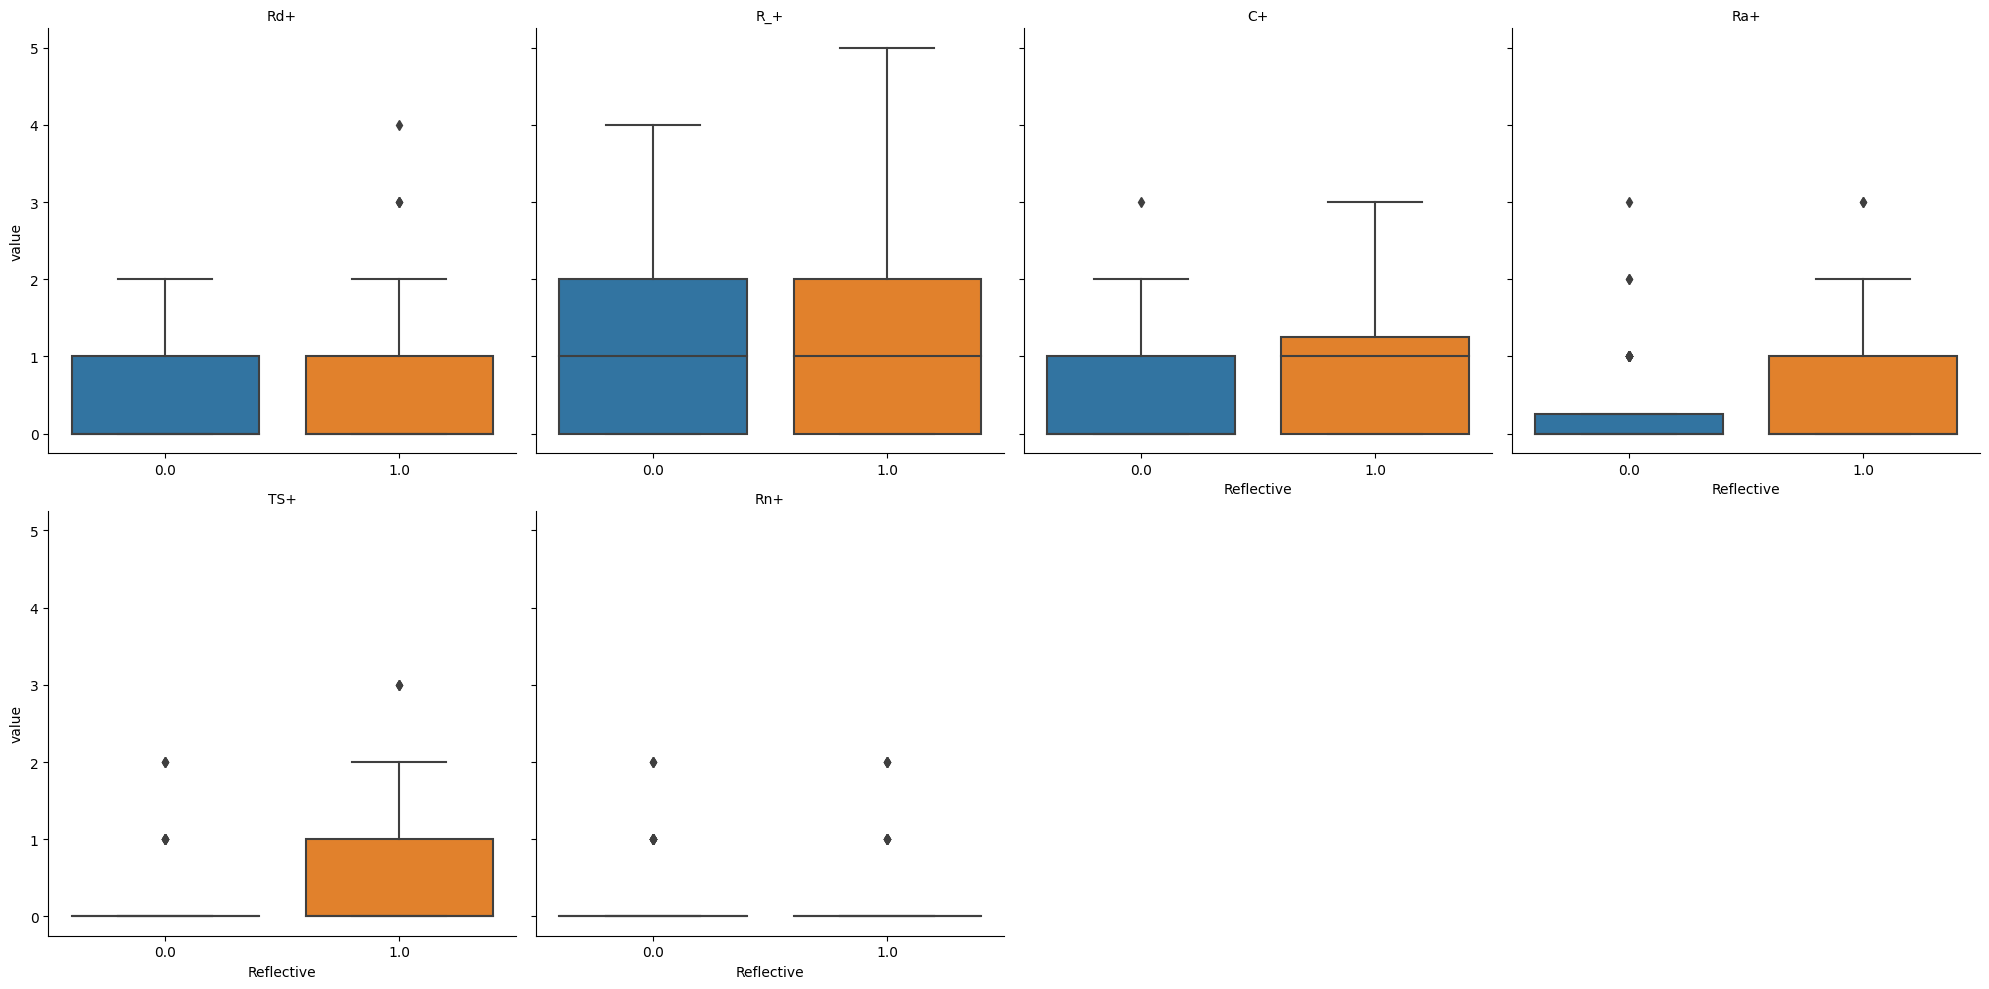

In [ ]:
g = sns.catplot(utterance_readiness[utterance_readiness["Valence"] == "Change"], x="Reflective", y="value", col="variable", kind="box", 
            col_wrap=4, sharex=False)
            #facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


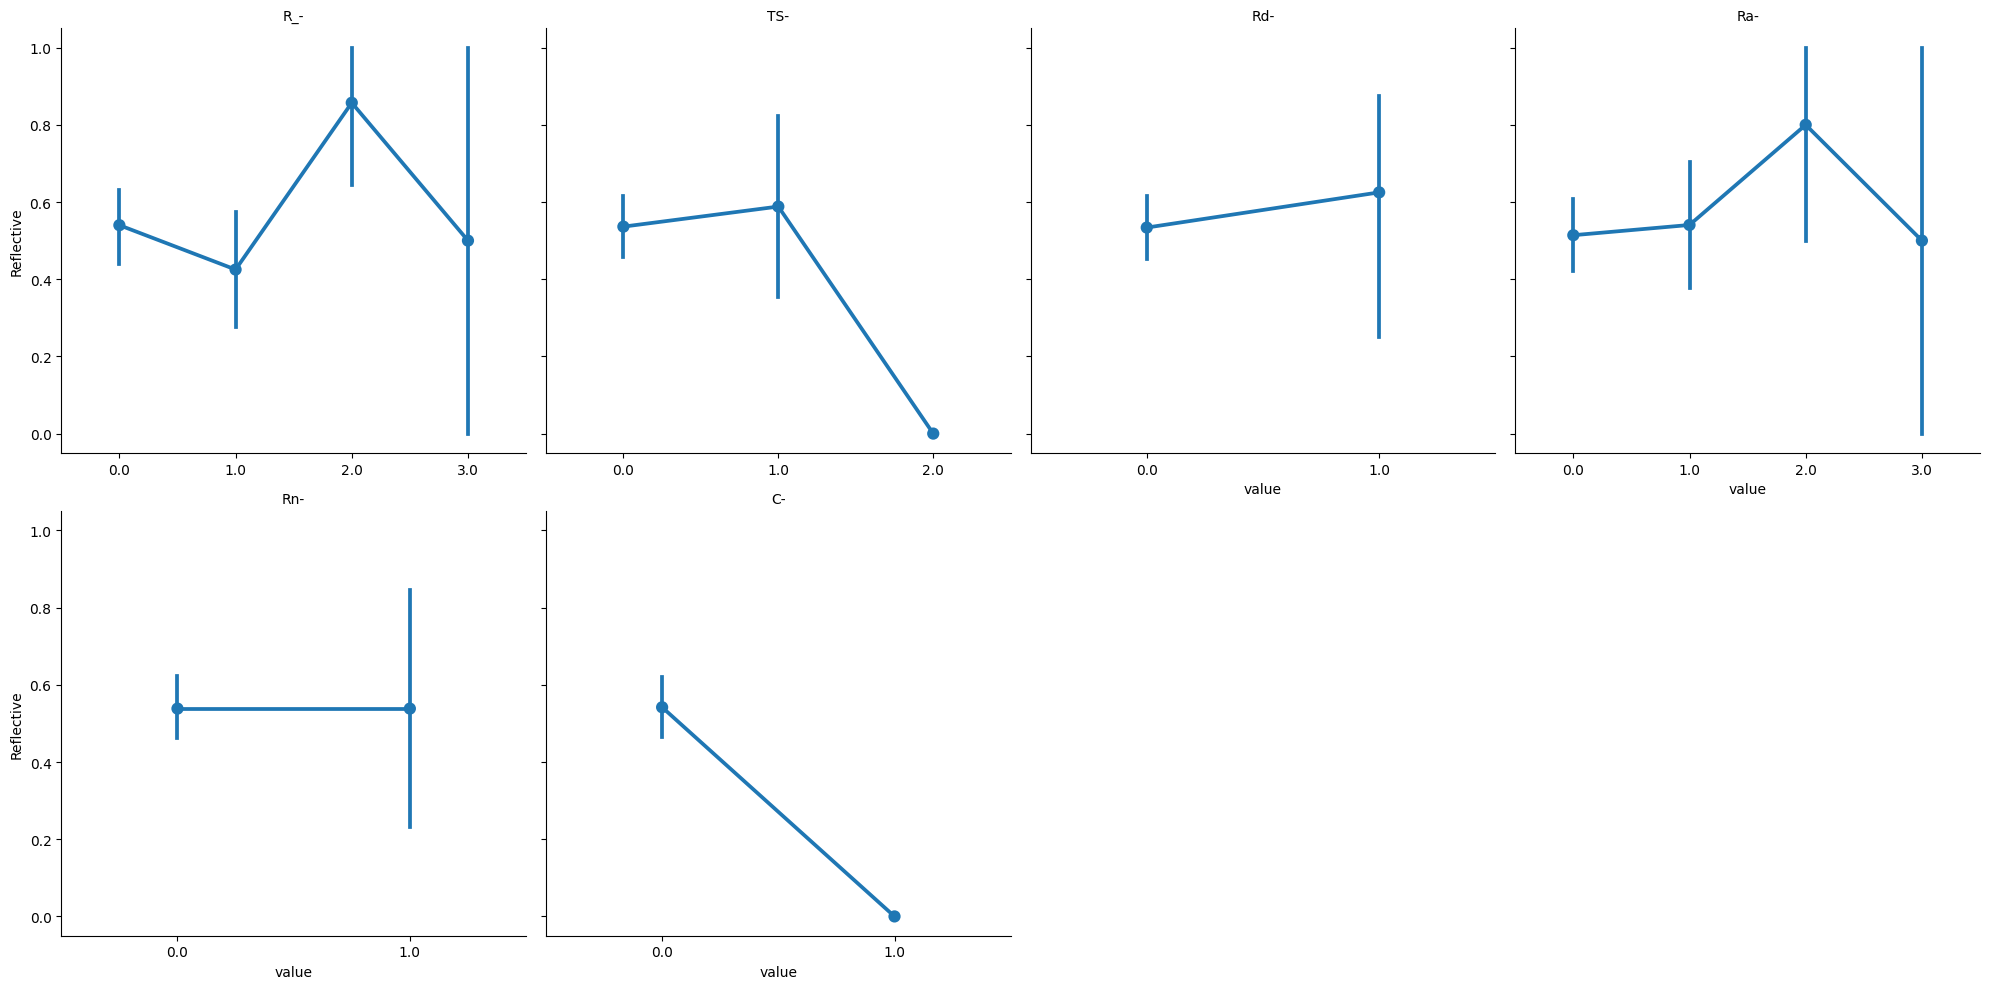

In [ ]:
g = sns.catplot(utterance_readiness[utterance_readiness["Valence"] == "Sustain"], x="value", y="Reflective", col="variable", kind="point", 
            col_wrap=4, sharex=False)
            #facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

In [ ]:
print(user.columns)

Index(['Unnamed: 0', 'user_id', 'start_time', 'end_time', 'condition',
       'education', 'job', 'identification_with_goal',
       'current_pursuit_of_target', 'readiness_to_change_start',
       'readiness_to_change_end', 'wai_sr_1', 'wai_sr_2', 'wai_sr_3',
       'wai_sr_4', 'wai_sr_5', 'wai_sr_6', 'wai_sr_7', 'wai_sr_8', 'wai_sr_9',
       'wai_sr_10', 'wai_sr_11', 'wai_sr_12', 'fa_s1', 'fa_s2', 'fa_s3',
       'pu_s1', 'pu_s2', 'pu_s3', 'rw_s1', 'rw_s2', 'rw_s3', 'pm_1', 'pm_2',
       'pm_3', 'pm_4', 'pm_5', 'pm_6', 'pm_7', 'pm_8', 'pm_9', 'pm_10',
       'pm_11', 'cc_1', 'cc_2', 'cc_3', 'cc_4', 'pe_1', 'pe_2', 'pe_3',
       'attention_check', 'Submission id', 'Time taken', 'Total approvals',
       'Age', 'Sex', 'Therapeutic Alliance', 'User Engagement',
       'Perception of MI', 'Perception MI Inadherent', 'Perceived Empathy',
       'Communication Competence', 'Readiness to Change (Delta)', 'stage',
       'target_behaviour', 'chat_id', 'Cooperative', 'Reflective',
       '

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["Readiness to Change (Delta)"], value_vars=['Reason', 'Commitment', 'Taking Steps',
       'desire', 'General Reason', 'ability', 'need'])

# Adding new column 'Valence' with conditions applied
utterance_readiness.head()

,Readiness to Change (Delta),variable,value
0,0.0,Reason,3.0
1,1.0,Reason,5.0
2,2.0,Reason,4.0
3,2.0,Reason,2.0
4,-2.0,Reason,6.0


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)
/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


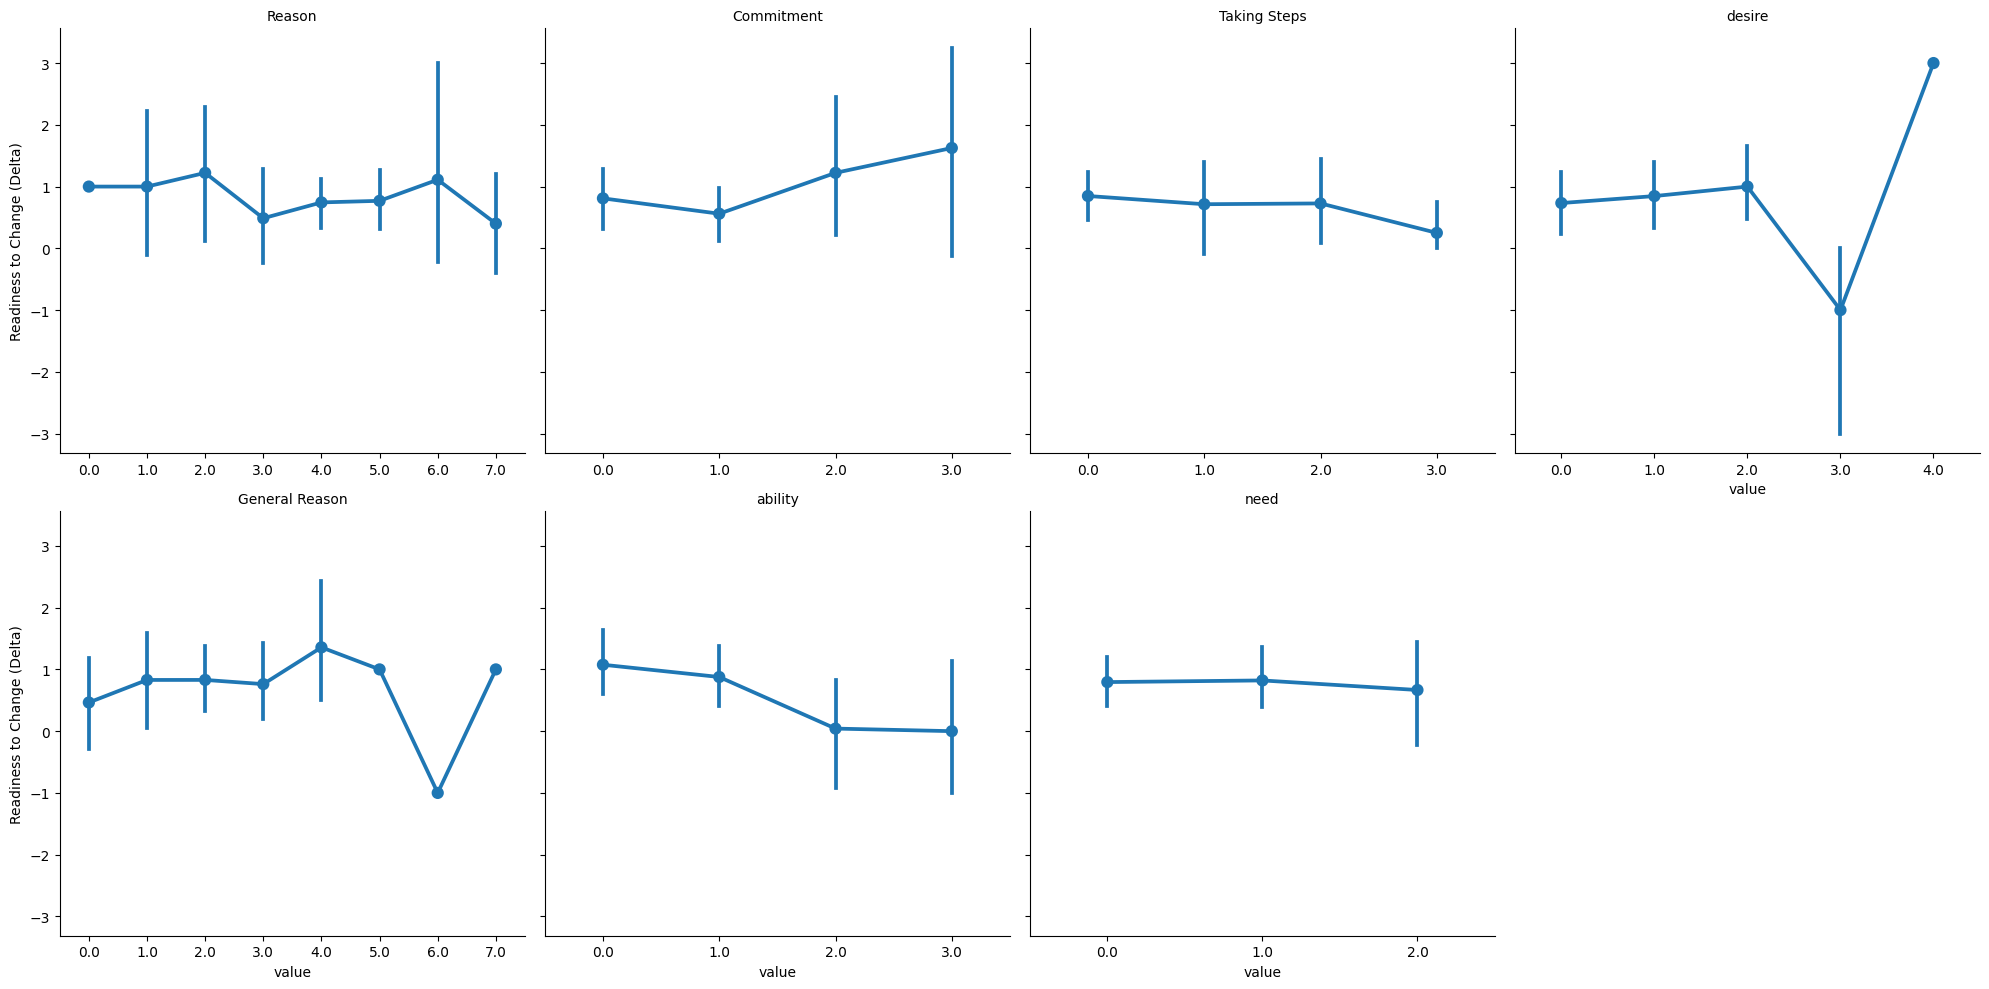

In [ ]:
g = sns.catplot(utterance_readiness, x="value", y="Readiness to Change (Delta)", col="variable", kind="point", 
            col_wrap=4, sharex=False)
            #facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["Readiness to Change (Delta)"], value_vars=['change',
       'Follow/Neutral', 'sustain'])

# Adding new column 'Valence' with conditions applied
utterance_readiness.head()

,Readiness to Change (Delta),variable,value
0,0.0,change,4.0
1,1.0,change,4.0
2,2.0,change,6.0
3,2.0,change,3.0
4,-2.0,change,4.0


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


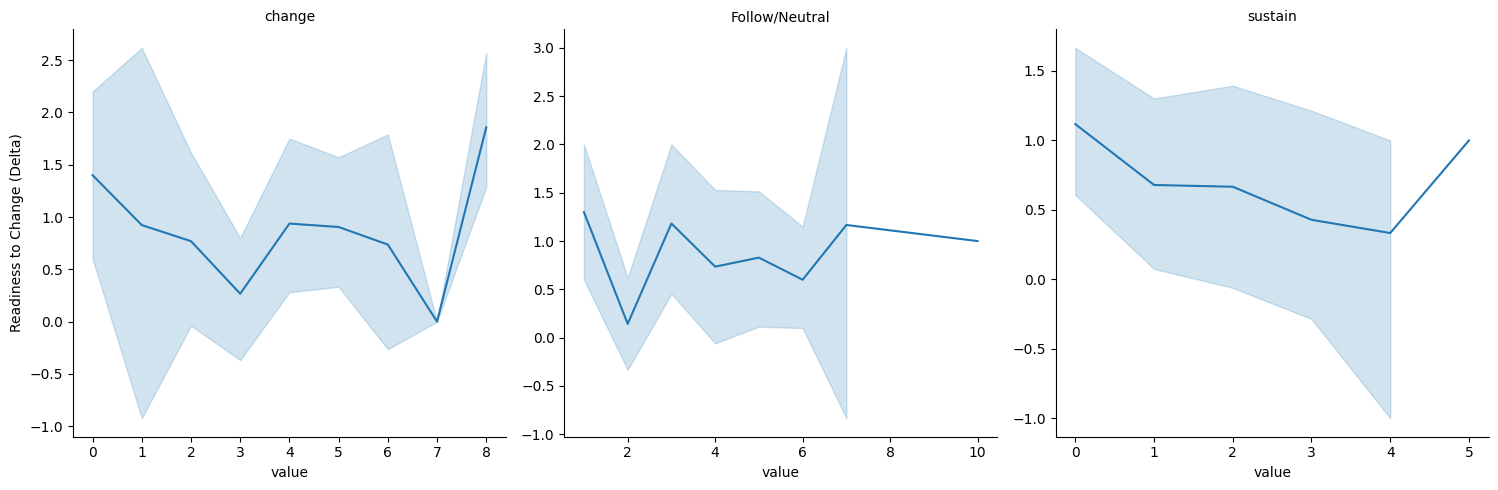

In [ ]:
g = sns.relplot(utterance_readiness, x="value", y="Readiness to Change (Delta)", col="variable", kind="line", 
            #col_wrap=4, sharex=False)
            facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")

In [ ]:
utterance_readiness = pd.melt(user, id_vars=["Readiness to Change (Delta)"], value_vars=['gut/hilfreich', 'schlecht/unpassend'])

# Adding new column 'Valence' with conditions applied
utterance_readiness.head()

,Readiness to Change (Delta),variable,value
0,0.0,gut/hilfreich,7.0
1,1.0,gut/hilfreich,7.0
2,2.0,gut/hilfreich,6.0
3,2.0,gut/hilfreich,7.0
4,-2.0,gut/hilfreich,4.0


/Users/selinameyer/Documents/GitHub/Gradio_Chatbot/gradio_bot/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


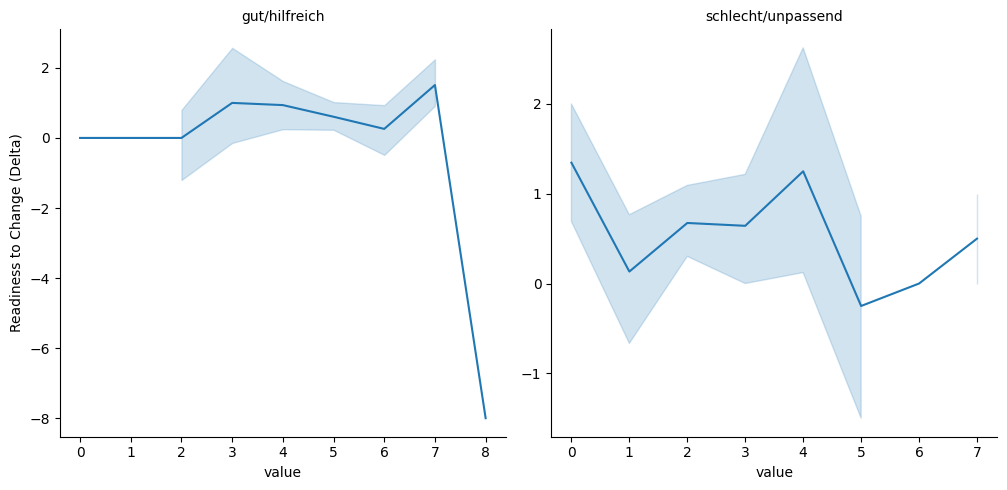

In [ ]:
g = sns.relplot(utterance_readiness, x="value", y="Readiness to Change (Delta)", col="variable", kind="line", 
            #col_wrap=4, sharex=False)
            facet_kws={'sharex': False, 'sharey': False}, col_wrap=4)

g.set_titles("{col_name}")